# Preprocessing sample data 

In [19]:
!pip install kneed  

  Running setup.py bdist_wheel for kneed: started
  Running setup.py bdist_wheel for kneed: finished with status 'done'
  Stored in directory: C:\Users\Plaban_Nayak\AppData\Local\pip\Cache\wheels\de\36\b1\6f1499979c9d0e1d1732081b7f50847156405c5ab7d493fbef
Successfully built kneed


Cache entry deserialization failed, entry ignored
You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import tensorflow as tf
from kneed import DataGenerator, KneeLocator #Knee-point detection in Python
from matplotlib import style
style.use("ggplot")
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
%matplotlib inline
import datetime
class Alarm_Corelation:
    def __init__(self):
        self.file_name = file_name
    def process_data(file_name):
        df_inp = pd.read_csv('Kmeans.csv')
        print(df_inp.head())
        df_sample = df_inp.copy()
        df_sample = df_sample[['FirstNotifiedAt','SiteID','InstanceID']]
        df_sample['Date'] = pd.to_datetime(df_sample['FirstNotifiedAt'], unit = 's')
        df_sample['Hour'] = df_sample['Date'].dt.hour
        df_sample = df_sample[pd.unique(['Date']+df_sample.columns.values.tolist()).tolist()]
        print(df_sample.head())
        df_data =  df_sample.copy()
        df_data.drop('Hour',axis=1,inplace=True)
        df_data = df_data.set_index('Date')
        print(df_data.count())
        data = df_data.values.tolist()
        x = range(1,df_sample.Hour.nunique()+ 1)
        y = df_sample.Hour.unique()
        print(len(x),len(y))
        #Knee-point detection in Python
        kn = KneeLocator(x, y, direction='decreasing')
        k = kn.knee
        #knee point plot
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.xticks(range(1,21))
        plt.plot(x, y, 'bx-')
        plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
        plt.title("optimal number of clusters (k) to use in k-means clustering")
        #plt.show()
        plt.savefig("optimal_k_Value.png")
        return df_data,data,k
    
    def build_model(k):
        num_clusters = k
        estimator = tf.contrib.learn.KMeansClustering(
        num_clusters,
        model_dir="C:/new0",
        initial_clusters='kmeans_plus_plus',
        distance_metric='squared_euclidean',
        relative_tolerance = 0.001,
        kmeans_plus_plus_num_retries = 10,
        use_mini_batch=True)
        return estimator
    
    
        
    def train_model(kmeans,X):
        def train_input_fn():
            data = tf.constant(X, tf.float32)
            return (data, None)
        
        kmeans.fit(input_fn=train_input_fn,steps=1000)
        
        
    def predict_clusters(kmeans,X):
        def predict_input_fn():
            data = tf.constant(X, tf.float32)
            return (data, None)
        clusters_predict = kmeans.predict_cluster_idx(input_fn=predict_input_fn)
        clusters = list(clusters_predict)
        return clusters
    def Kmeans_data_visualize(df,X,Clusters,k):
        df['Clusters'] = Clusters
        print(df.head())
        data2 = df.values
       
        num_clusters = k
        kmeans = KMeans( num_clusters )
        kmeans.fit(X)
        cluster_num = k
        centroids = kmeans.cluster_centers_
        labels = kmeans.labels_
        colors = ["g.","r.","c.","y."]
        color = np.random.rand(cluster_num)
        c = Counter(labels)
        fig = figure()
        ax = fig.gca(projection='3d')
        fignum = 1
        for i in range(len(X)):
            ax.scatter(X[i][0], X[i][1],X[i][2],c=None)
        ax.scatter(centroids[:, 0],centroids[:, 1],centroids[:, 2], marker = "x", s=150, linewidths = 5, zorder = 100)
        plt.title('Kmeans Clustering')
        #plt.show()
        plt.savefig('Kmeansclustering.png')
        
    def export_cluster_data(df,Clusters):
        df['Clusters'] = Clusters
        print(df.head())
        df.to_csv("Clusters_Predicted.csv",index=False)
        df_cluster = df.copy()
        return df_cluster
    
    def process_jaccard(df_cluster):
        #Organizing DeviceIDs based on the clusters generated by K means Algorithm
        sample = df_cluster.copy()
        sample = sample[['FirstNotifiedAt','InstanceID','Clusters']]
        print(sample.head())
        num_cluster = sample['Clusters'].unique()
        print(len(num_cluster))
        dfnew = df_cluster.groupby(['FirstNotifiedAt','Clusters']).size().reset_index(name='Freq')
        df_eval = dfnew[dfnew.Freq > 1]
        #creating list variables dynamically 
        df_e = df_eval.values
        for items in df_e:
            vars()["list"+str(items[1])] = []
        
        common_device= {}
        test = sample.values
        for items in df_e:
            list1 = []
            for i in test:
                if (i[0] == items[0]):  
                     list1.append(i[1])
             
            common_device[str(int(items[0]))+ "|" + str(int(items[1]))]= list1
        #######################################################################   
        dev_list = []
        #print(common_device)
        for K,V in common_device.items():
               dev_list.append(V)
        #######################################################################  
        new_list = []
        for items in dev_list:
            k = dev_list.count(items)
            if [items,k] not in new_list:
                new_list.append([items,k])
        #######################################################################  
        #eliminating duplicates 
        list_no_dup_dev = []
        [list_no_dup_dev.append(item) for item in new_list if item not in list_no_dup_dev]
        print(len(list_no_dup_dev))
        #######################################################################  
        #Adding the element ids into corresponding sets corresponding to each cluster
        grp = sample.values
        grp = grp.tolist()
        #######################################################################
        for i in range(0,len(num_cluster)):
            vars()["set"+str(num_cluster[i])]= set()
            
        for i in range(len(grp)):
             #print(grp[i],i)
             #if grp[i][0] == 1:
            vars()["set"+str(grp[i][2])].add(grp[i][1])
        #print(set0)
        #######################################################################
        dict_cluster={}
        print(len(num_cluster))
        for i in range(0,len(num_cluster)):
            
            #print('The number of elements in  SET'+str(num_cluster[i])+' : ',len(vars()["set"+str(num_cluster[i])]))
            #print('The Contents of SET'+str(num_cluster[i])+' : ',vars()["set"+str(num_cluster[i])])
            #print('\n')
            dict_cluster[i] = vars()["set"+str(num_cluster[i])]
        print(len(dict_cluster))
        
        #######################################################################    
        # adding only those device sets which have a cardinality GE 1
        list_set1 =[]
        for i in range(0,len(num_cluster)):
            if len(vars()["set"+str(num_cluster[i])]) > 1:
                list_set1.append(vars()["set"+str(num_cluster[i])])
            else:
                print(vars()["set"+str(num_cluster[i])])
        #######################################################################         
        #Jaccard index calculation function
        def jaccard_similarity(x,y):
             intersection_dev =  set.intersection(*[set(x), set(y)])
             intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
             intersection_dev =  set.intersection(*[set(x), set(y)])
             union_cardinality = len(set.union(*[set(x), set(y)]))
     
             if union_cardinality > 0:
                similar = intersection_cardinality/float(union_cardinality)
        
             else:
                similar = 0.0     
    
             return (similar,intersection_dev)
        #######################################################################  
        list_linked1 = []
        for q in range(0,len(list_set1)):
            outk = [k for k, v in dict_cluster.items() if v == list_set1[q]]
            for i in range(0,len(list_set1)):
                ink = [k1 for k1, v1 in dict_cluster.items() if v1 == list_set1[i]]
                if i > q :
                    r,common_dev = jaccard_similarity(list_set1[q], list_set1[i])
                    if (r > 0.0) :
                        list_linked1.append(('SET'+str(outk),'SET'+str(ink),common_dev,r))
        #######################################################################                 
        #prepare second list of device id
        a = []
        print("list_linked1 : ",len(list_linked1))
        for items in list_linked1:
            a.append(items[2])
        #eliminated duplicate device id groups
        list_linked_no_dup =[]
        [list_linked_no_dup.append(item) for item in a if item not in list_linked_no_dup]
        print("no duplicates : ",len(list_linked_no_dup))
        ######################################################################  
        #Jaccard iterations 
        #Creating sets from the list of linked devices derived in the previous step and find out the similarity score between these sets
        now = datetime.datetime.now()
        loop = 0
        no_of_loop_list = []
        if len(list_linked_no_dup) > 0:
            listname = list_linked_no_dup
        else:
            listname = a
        
        pred_device_filename = 'linkeddeviceJaccard-' + str(now.isoformat()).replace(":","")+'.txt'

        predfile = open(pred_device_filename,'w') 
        while True:
            loop = loop + 1
            vars()["list_set"+str(loop)] =[]
            vars()["list_linked"+str(loop)]  = []
            for i in range(0,len(listname)):
                vars()["SET"+str(i)]= listname[i]
            list_set_loop =[]
            for i in range(0,len(listname)):
                if len(vars()["SET"+str(i)]) > 1:
                    list_set_loop.append(vars()["SET"+str(i)])          
            #print(list_set_loop)
            common_devices = []
            for q in range(0,len(list_set_loop)):
                for i in range(0,len(list_set_loop)):
                
                    if i > q :
                    
                        r,common_dev  = jaccard_similarity(list_set_loop[q], list_set_loop[i])
                 #print('r : ',r)
                        if (r >= 0.60):
                        
                            print('jaccard_distance : ',r,'common device : ',common_dev)
                            common_devices.append(common_dev)
                     
                 
                    
            
            pred_linked_devices = []
            for item in common_devices:
                    if item not in pred_linked_devices:
                         pred_linked_devices.append(item) 
            print("inside loop  linked devices : ",len(pred_linked_devices))      
            if len(pred_linked_devices) >= 1:
                listname = pred_linked_devices   
                print(len(listname))
                print('Loop : ',loop)
                predfile.write('Loop : '+ str(loop))
                predfile.write('\n')
                print('============================================================')
                predfile.write('============================================================')
                predfile.write('\n')
                print('length of pred linked device',len(pred_linked_devices))
                predfile.write('length of pred linked device : '+ str(len(pred_linked_devices)))
                print('\n')
                predfile.write('\n')
                predfile.write('============================================================')
                predfile.write('\n')
                print('Linked Devices : ')
                predfile.write('Linked Devices having jaccard score > 0.50 : ')
                predfile.write('\n')
                print('============================================================')
                print('\n')
                predfile.write('\n')
                vars()["list_linked"+str(loop)] = pred_linked_devices
                no_of_loop_list.append(vars()["list_linked"+str(loop)])
                print(pred_linked_devices)
                predfile.write(str(pred_linked_devices))
                predfile.write('\n')
                predfile.write('============================================================')
                predfile.write('\n')
                print('============================================================')
                print('\n')
            else:

                break

        predfile.close()
        print(" no_of_loop_list len : ",len(no_of_loop_list),no_of_loop_list)
        #Determine Parent Child Relationship for the predicted linked device sets 
        temp_list_dev = []
        if len(no_of_loop_list) > 1 :
            Linked_Devices = no_of_loop_list[-1]
        else:
            for items in list_linked_no_dup:
                if len(items) > 1:
                    temp_list_dev.append(items)
            Linked_Devices = temp_list_dev
        return Linked_Devices,sample

    def Parent_Child_Link(Linked_Devices,df_cluster):
        now = datetime.datetime.now()
        sample = df_cluster.copy()
        sample = sample[['FirstNotifiedAt','InstanceID','Clusters']]
        print(sample.head())
        print(Linked_Devices)
        clst = []
        list4 = []
        Parent = []
        Child = []
        Jsc = []
        seta = []
        setb = []
        #######################################################################         
        #Jaccard index calculation function
        def jaccard_similarity(x,y):
             intersection_dev =  set.intersection(*[set(x), set(y)])
             intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
             intersection_dev =  set.intersection(*[set(x), set(y)])
             union_cardinality = len(set.union(*[set(x), set(y)]))
     
             if union_cardinality > 0:
                similar = intersection_cardinality/float(union_cardinality)
        
             else:
                similar = 0.0     
    
             return (similar,intersection_dev)
        ####################################################################### 

        filename1 = 'DeviceCluster-' + str(now.isoformat()).replace(':','')+'.txt'
        filename2 = 'ParentChildRelationship-' + str(now.isoformat()).replace(':','')+'.txt'

        device_cluster1 = open(filename1,'w')
        parent_child = open(filename2,'w')
        for items in Linked_Devices:
            #print(items)
            list1 = list(items)
            print("list1 - Oranet child link : ",list1)
            device_list =[]
            cluster_list =[]
            for j in range(len(list1)):

                
                df1 = sample[sample['InstanceID'] == list1[j]]
                dev2 =df1['Clusters'].values
                list2 = set(dev2)
                list3 = list(list2)
                device_list.append(list1[j])
                cluster_list.append(list2)
                device_cluster1.write(str(list1[j])+" : " + str(list2)+ "\n")
            device_cluster1.write("=====================================================================\n")    

            for q in range(len(cluster_list)):
                for i in range(len(cluster_list)):
                    if i > q :
                         r,common_dev  = jaccard_similarity(cluster_list[q], cluster_list[i])
                         if r >= 0.80:
                            print("Cluster 1 : ",cluster_list[q])
                            print("Device id 1 : ",device_list[q])
                            print("Cluster 2 : ",cluster_list[i])
                            print("Device id 2 : ",device_list[i])
                            print("jaccard score :" , r)
                            print("Common Devices : ",common_dev)
                            parent_child.write("Device id 1 : " + str(device_list[q])+"\n")
                            parent_child.write("Cluster 1 : " + str(cluster_list[q])+"\n")
                            parent_child.write("\n")
                            parent_child.write("Device id 2 : " + str(device_list[i])+"\n")
                            parent_child.write("Cluster 2 : " + str(cluster_list[i])+"\n")
                            parent_child.write("\n")
                            parent_child.write("Jaccard score : " + str(r)+"\n")
                            parent_child.write("Common Device : " + str(common_dev) + "\n")
                            parent_child.write("\n")

                            if len(cluster_list[q]) > len(cluster_list[i]):
                                print( str(device_list[q]) + " is parent to " + str(device_list[i]))
                                print("\n")
                                parent_child.write(str(device_list[q]) + " is parent to " + str(device_list[i])+"\n")
                                Parent.append(device_list[q])
                                Child.append(device_list[i])
                                Jsc.append(r)


                            else:
                                if len(cluster_list[q]) == len(cluster_list[i]) and r == 1.0:
                                    print( str(device_list[q]) + " present in same clusters " + str(device_list[i]))
                                    print("\n")
                                    parent_child.write(str(device_list[q]) + " present in same clusters " + str(device_list[i])+"\n")

                                else:
                                    if len(cluster_list[q]) == len(cluster_list[i]) and r < 1.0:
                                         print( str(device_list[q]) + " is parent to " + str(device_list[i]))
                                         print("\n")
                                         parent_child.write(str(device_list[q]) + " is parent to " + str(device_list[i])+"\n")
                                         Parent.append(device_list[q])
                                         Child.append(device_list[i])
                                         Jsc.append(r)
                                    else:
                                         print( str(device_list[q]) + " is child to " + str(device_list[i]))
                                         print("\n")
                                         parent_child.write(str(device_list[q]) + " is child to " + str(device_list[i])+"\n")
                                         Parent.append(device_list[i])
                                         Child.append(device_list[q])
                                         Jsc.append(r)
                            parent_child.write("========================================================================\n")






        device_cluster1.close()   
        parent_child.close()
        return Parent,Child,Jsc
    ####################################################################################
    def derive_relation(Parent,Child,Jsc):
        #############################################################################################################
        df_jaccard = pd.DataFrame({"Parent":Parent,"Child":Child,"Similarity_Score":Jsc})
        df_jaccard = df_jaccard[['Parent','Child','Similarity_Score']]
        df_jaccard.head()
        a = pd.pivot_table(df_jaccard,index='Parent',columns='Child',values='Similarity_Score',fill_value=0)
        a.to_csv("Parent_Child_pivot.csv")
        plt.figure(figsize=(20,18))
        a.unstack('Parent').plot(kind='bar')
        plt.ylabel('Similarity Score')
        plt.title("Jaccard Similarity Score between Devices")
        #plt.show()
        plt.savefig("Jaccard_Score.png")
        #############################################################################################################
        p = df_jaccard['Parent'].unique()
        df = df_jaccard[df_jaccard['Parent'] == p[0]]
        b = pd.pivot_table(df,index='Parent',columns='Child',values='Similarity_Score',fill_value=0)
        plt.figure(figsize=(20,18))
        b.unstack('Parent').plot(kind='bar')
        plt.ylabel('Similarity Score')
        plt.title("Jaccard Similarity Score between a sample Device from the entire set")
        #plt.show()
        plt.savefig("Jaccard_Score_sample.png")
        #############################################################################################################

    
    

   Lastnofitied  FirstNotifiedAt   SiteID  InstanceID  LTimeCluster  \
0    1499855822       1499855822  3684492       24134    1499853600   
1    1500992767       1489833193  3606427       23473    1500991200   
2    1502538247       1487236451  3606357       23911    1502535600   
3    1505794196       1505794196  3658175       24092    1505793600   
4    1505940465       1500675765  3687379       23634    1505937600   

   FTimeCluster  15minutelastcluster  15minutefirstcluster  
0    1499853600           1499855400            1499855400  
1    1489831200           1500992100            1489833000  
2    1487235600           1502537400            1487235600  
3    1505793600           1505793600            1505793600  
4    1500674400           1505940300            1500675300  
                 Date  FirstNotifiedAt   SiteID  InstanceID  Hour
0 2017-07-12 10:37:02       1499855822  3684492       24134    10
1 2017-03-18 10:33:13       1489833193  3606427       23473    10
2 2017-02

list1 - Oranet child link :  [23465, 23602, 23876, 23541]
list1 - Oranet child link :  [23552, 23554, 23556, 23813, 23557, 23560, 23945, 23563, 23566, 23572, 23574, 23577, 23458, 23971, 23972, 23717, 23592, 23593, 23594, 23595, 23596, 23976, 23598, 23977, 23602, 23477, 23608, 23609, 23610, 23482, 23613, 23615, 23488, 23873, 23497, 23498, 23499, 23500, 23629, 23507, 23767, 23644, 24037, 23782, 23526, 23527, 23529, 23532, 23535, 23793, 24184, 23546, 24060]
Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 1 :  23552
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 2 :  23554
jaccard score : 0.8
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 17}
23552 is parent to 23554


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 1 :  23552
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23563
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 17, 18}
23552 is child to 23563


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 1 :  

23497 is parent to 23529


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 1 :  23497
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.8181818181818182
Common Devices :  {0, 4, 6, 8, 10, 11, 12, 17, 18}
23497 is parent to 23546


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23498
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.9090909090909091
Common Devices :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23498 is parent to 23546


Cluster 1 :  {2, 4, 8, 10, 11, 14, 17, 18}
Device id 1 :  23499
Cluster 2 :  {4, 8, 10, 11, 14, 17, 18}
Device id 2 :  23500
jaccard score : 0.875
Common Devices :  {4, 8, 10, 11, 14, 17, 18}
23499 is parent to 23500


Cluster 1 :  {17, 10, 4}
Device id 1 :  23629
Cluster 2 :  {17, 10, 4}
Device id 2 :  23507
jaccard score : 1.0
Common Devices :  {17, 10, 4}
23629 present in same clusters 23507


Cluster 1 :  {8, 17, 10, 4}
Device id 1 :  23767
Cluster 

Cluster 1 :  {4, 6, 10, 11, 14, 17, 18}
Device id 1 :  23593
Cluster 2 :  {4, 6, 10, 11, 14, 17}
Device id 2 :  23596
jaccard score : 0.8571428571428571
Common Devices :  {4, 6, 10, 11, 14, 17}
23593 is parent to 23596


Cluster 1 :  {4, 6, 8, 10, 11, 14, 17}
Device id 1 :  23595
Cluster 2 :  {4, 6, 10, 11, 14, 17}
Device id 2 :  23596
jaccard score : 0.8571428571428571
Common Devices :  {4, 6, 10, 11, 14, 17}
23595 is parent to 23596


Cluster 1 :  {4, 6, 8, 10, 11, 14, 17}
Device id 1 :  23595
Cluster 2 :  {4, 6, 8, 10, 11, 17}
Device id 2 :  23610
jaccard score : 0.8571428571428571
Common Devices :  {4, 6, 8, 10, 11, 17}
23595 is parent to 23610


Cluster 1 :  {4, 6, 8, 10, 11, 14, 17}
Device id 1 :  23595
Cluster 2 :  {4, 6, 8, 10, 11, 17}
Device id 2 :  23644
jaccard score : 0.8571428571428571
Common Devices :  {4, 6, 8, 10, 11, 17}
23595 is parent to 23644


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 1 :  23598
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Devi

Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
Device id 2 :  23560
jaccard score : 0.8
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 17}
23557 is child to 23560


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 17}
Device id 1 :  23557
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 2 :  23598
jaccard score : 0.8888888888888888
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 17}
23557 is child to 23598


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 17}
Device id 1 :  23557
Cluster 2 :  {0, 4, 6, 8, 10, 11, 17}
Device id 2 :  23615
jaccard score : 0.875
Common Devices :  {0, 4, 6, 8, 10, 11, 17}
23557 is parent to 23615


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 17}
Device id 1 :  23557
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23497
jaccard score : 0.8
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 17}
23557 is child to 23497


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23560
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23563
jaccard score : 0.9090

Device id 1 :  23553
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23458
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
23553 is child to 23458


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23482
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
23553 is child to 23482


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23613
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
23553 is child to 23613


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 2, 4, 6, 8, 11, 14, 18}
Device id 2 :  23618
jaccard score : 0.8
Common Devices :  {0, 2, 4, 6, 8, 11, 14, 18}
23553 is parent to 23618


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18

jaccard score : 0.8571428571428571
Common Devices :  {0, 4, 6, 8, 11, 18}
23456 is parent to 23486


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23458
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 2 :  23598
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
23458 is parent to 23598


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23458
Cluster 2 :  {1, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23602
jaccard score : 0.8333333333333334
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23458 is parent to 23602


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23458
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23482
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23458 present in same clusters 23482


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23458
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14

Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23458
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
23560 is child to 23458


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23560
Cluster 2 :  {0, 2, 4, 8, 10, 11, 17, 18}
Device id 2 :  23477
jaccard score : 0.8
Common Devices :  {0, 2, 4, 8, 10, 11, 17, 18}
23560 is parent to 23477


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23560
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23482
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
23560 is child to 23482


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23560
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23613
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
23560 is child to 23613


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23

Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is child to 23602


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23482
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is child to 23482


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23613
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is child to 23613


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23498
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is child to 23498


Cluster 1 :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23556
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
Device id 2 :  23560
jaccard score : 0.81818

Device id 1 :  23557
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
Device id 2 :  23560
jaccard score : 0.8
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 17}
23557 is child to 23560


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 17}
Device id 1 :  23557
Cluster 2 :  {2, 4, 6, 8, 10, 11, 17}
Device id 2 :  23577
jaccard score : 0.875
Common Devices :  {2, 4, 6, 8, 10, 11, 17}
23557 is parent to 23577


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 17}
Device id 1 :  23557
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 2 :  23598
jaccard score : 0.8888888888888888
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 17}
23557 is child to 23598


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 17}
Device id 1 :  23557
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23497
jaccard score : 0.8
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 17}
23557 is child to 23497


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23560
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23563
j

Cluster 2 :  {2, 4, 6, 12, 14, 18}
Device id 2 :  23485
jaccard score : 1.0
Common Devices :  {2, 4, 6, 12, 14, 18}
23460 present in same clusters 23485


Cluster 1 :  {4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23592
Cluster 2 :  {4, 6, 10, 11, 14, 17, 18}
Device id 2 :  23593
jaccard score : 0.875
Common Devices :  {4, 6, 10, 11, 14, 17, 18}
23592 is parent to 23593


Cluster 1 :  {4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23592
Cluster 2 :  {4, 6, 11, 12, 14, 17, 18}
Device id 2 :  23594
jaccard score : 0.875
Common Devices :  {4, 6, 11, 12, 14, 17, 18}
23592 is parent to 23594


Cluster 1 :  {4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23592
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.8
Common Devices :  {4, 6, 10, 11, 12, 14, 17, 18}
23592 is child to 23546


Cluster 1 :  {4, 6, 10, 11, 14, 17, 18}
Device id 1 :  23593
Cluster 2 :  {4, 6, 10, 11, 14, 17}
Device id 2 :  23596
jaccard score : 0.8571428571428571
Common Devices :  {4,

Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23482
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23563 present in same clusters 23482


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23613
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23563 present in same clusters 23613


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.9090909090909091
Common Devices :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23563 is parent to 23546


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23497
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6

Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {1, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23602
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is child to 23602


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23482
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is child to 23482


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23613
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is child to 23613


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23498
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is child

Cluster 1 :  {4, 6, 10, 11, 14, 17, 18}
Device id 1 :  23593
Cluster 2 :  {4, 6, 10, 11, 14, 17}
Device id 2 :  23596
jaccard score : 0.8571428571428571
Common Devices :  {4, 6, 10, 11, 14, 17}
23593 is parent to 23596


Cluster 1 :  {4, 6, 8, 10, 11, 14, 17}
Device id 1 :  23595
Cluster 2 :  {4, 6, 10, 11, 14, 17}
Device id 2 :  23596
jaccard score : 0.8571428571428571
Common Devices :  {4, 6, 10, 11, 14, 17}
23595 is parent to 23596


Cluster 1 :  {4, 6, 8, 10, 11, 14, 17}
Device id 1 :  23595
Cluster 2 :  {4, 6, 8, 10, 11, 17}
Device id 2 :  23610
jaccard score : 0.8571428571428571
Common Devices :  {4, 6, 8, 10, 11, 17}
23595 is parent to 23610


Cluster 1 :  {4, 6, 8, 10, 11, 14, 17}
Device id 1 :  23595
Cluster 2 :  {4, 6, 8, 10, 11, 17}
Device id 2 :  23644
jaccard score : 0.8571428571428571
Common Devices :  {4, 6, 8, 10, 11, 17}
23595 is parent to 23644


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 1 :  23598
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Devi

Common Devices :  {4, 6, 8, 10, 11, 17}
23574 is child to 23595


Cluster 1 :  {4, 6, 8, 10, 11, 17}
Device id 1 :  23574
Cluster 2 :  {4, 6, 8, 10, 11, 17}
Device id 2 :  23610
jaccard score : 1.0
Common Devices :  {4, 6, 8, 10, 11, 17}
23574 present in same clusters 23610


Cluster 1 :  {4, 6, 8, 10, 11, 17}
Device id 1 :  23574
Cluster 2 :  {0, 4, 6, 8, 10, 11, 17}
Device id 2 :  23615
jaccard score : 0.8571428571428571
Common Devices :  {4, 6, 8, 10, 11, 17}
23574 is child to 23615


Cluster 1 :  {4, 6, 8, 10, 11, 17}
Device id 1 :  23574
Cluster 2 :  {4, 6, 8, 10, 11, 17}
Device id 2 :  23644
jaccard score : 1.0
Common Devices :  {4, 6, 8, 10, 11, 17}
23574 present in same clusters 23644


Cluster 1 :  {2, 4, 6, 8, 10, 11, 17}
Device id 1 :  23577
Cluster 2 :  {4, 6, 8, 10, 11, 17}
Device id 2 :  23610
jaccard score : 0.8571428571428571
Common Devices :  {4, 6, 8, 10, 11, 17}
23577 is parent to 23610


Cluster 1 :  {2, 4, 6, 8, 10, 11, 17}
Device id 1 :  23577
Cluster 2 :  {4, 6, 

Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23563
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
23556 is child to 23563


Cluster 1 :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23556
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23458
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
23556 is child to 23458


Cluster 1 :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23556
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23482
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
23556 is child to 23482


Cluster 1 :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23556
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23613
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
23556 is child to 23613


Cluster 1 :  {0, 2, 4, 6, 1

Device id 2 :  23598
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
23554 present in same clusters 23598


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 1 :  23554
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23482
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
23554 is child to 23482


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 1 :  23554
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23613
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
23554 is child to 23613


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 1 :  23554
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23497
jaccard score : 0.9
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
23554 is child to 23497


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 1 :  23554
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23

Device id 2 :  23527
jaccard score : 0.8888888888888888
Common Devices :  {0, 2, 4, 6, 8, 11, 12, 17}
23598 is parent to 23527


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 1 :  23598
Cluster 2 :  {0, 2, 4, 6, 8, 11, 12, 17}
Device id 2 :  23529
jaccard score : 0.8888888888888888
Common Devices :  {0, 2, 4, 6, 8, 11, 12, 17}
23598 is parent to 23529


Cluster 1 :  {1, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23602
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23482
jaccard score : 0.8333333333333334
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23602 is parent to 23482


Cluster 1 :  {1, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23602
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23613
jaccard score : 0.8333333333333334
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23602 is parent to 23613


Cluster 1 :  {1, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23602
Cluster 2 :  {0, 2, 4, 6, 8, 10

Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23613
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
23554 is child to 23613


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 1 :  23554
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23497
jaccard score : 0.9
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
23554 is child to 23497


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 1 :  23554
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23498
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
23554 is child to 23498


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 1 :  23554
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23654
jaccard score : 0.8
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 17}
23554 is parent to 23654


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 1 :  23554
Cluster 2 :  {0, 2, 4, 6, 8, 11, 12, 17

jaccard score : 0.8888888888888888
Common Devices :  {0, 2, 4, 6, 8, 11, 12, 17}
23598 is parent to 23529


Cluster 1 :  {1, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23602
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23482
jaccard score : 0.8333333333333334
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23602 is parent to 23482


Cluster 1 :  {1, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23602
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23613
jaccard score : 0.8333333333333334
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23602 is parent to 23613


Cluster 1 :  {1, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23602
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23498
jaccard score : 0.8333333333333334
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23602 is parent to 23498


Cluster 1 :  {0, 2, 4, 8, 10, 11, 17, 18}
Device id 1 :  23477
Cluster 2 :  {0, 2, 4, 6, 8, 10, 1

jaccard score : 0.875
Common Devices :  {6, 8, 10, 11, 14, 17, 18}
23559 is parent to 23580


Cluster 1 :  {2, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23559
Cluster 2 :  {2, 6, 8, 10, 11, 14, 17, 18}
Device id 2 :  23648
jaccard score : 1.0
Common Devices :  {2, 6, 8, 10, 11, 14, 17, 18}
23559 present in same clusters 23648


Cluster 1 :  {2, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23559
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.8
Common Devices :  {2, 6, 8, 10, 11, 14, 17, 18}
23559 is child to 23531


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23560
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23563
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
23560 is child to 23563


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23560
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23458
jaccard score : 0.9090909090909091
Comm

Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 1 :  23497
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23654
jaccard score : 0.9
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 17, 18}
23497 is parent to 23654


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 1 :  23497
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 17, 18}
23497 is parent to 23531


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 1 :  23497
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.8181818181818182
Common Devices :  {0, 4, 6, 8, 10, 11, 12, 17, 18}
23497 is parent to 23546


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23498
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23654
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 17, 18}
23498 is parent to 23654


Clu



Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {1, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23602
jaccard score : 0.8333333333333334
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23563 is parent to 23602


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23482
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23563 present in same clusters 23482


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23613
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23563 present in same clusters 23613


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23497
jaccard score : 0.9090909090909091
Common Devices :  {0, 2,

Device id 2 :  23548
jaccard score : 0.8181818181818182
Common Devices :  {0, 6, 8, 10, 11, 12, 14, 17, 18}
23458 is parent to 23548


Cluster 1 :  {0, 8, 10, 11, 14, 17, 18}
Device id 1 :  23589
Cluster 2 :  {0, 8, 10, 14, 17, 18}
Device id 2 :  23797
jaccard score : 0.8571428571428571
Common Devices :  {0, 8, 10, 14, 17, 18}
23589 is parent to 23797


Cluster 1 :  {17, 10, 11, 14, 6}
Device id 1 :  23591
Cluster 2 :  {4, 6, 10, 11, 14, 17}
Device id 2 :  23596
jaccard score : 0.8333333333333334
Common Devices :  {17, 10, 11, 14, 6}
23591 is child to 23596


Cluster 1 :  {17, 10, 11, 14, 6}
Device id 1 :  23591
Cluster 2 :  {17, 10, 11, 14, 6}
Device id 2 :  23890
jaccard score : 1.0
Common Devices :  {17, 10, 11, 14, 6}
23591 present in same clusters 23890


Cluster 1 :  {4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23592
Cluster 2 :  {4, 6, 10, 11, 14, 17, 18}
Device id 2 :  23593
jaccard score : 0.875
Common Devices :  {4, 6, 10, 11, 14, 17, 18}
23592 is parent to 23593


Cluster 1

Device id 1 :  23482
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23498
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23482 present in same clusters 23498


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23482
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23654
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 17, 18}
23482 is parent to 23654


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23482
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
23482 is parent to 23531


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23482
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.9090909090909091
Common Devices :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23482 is parent to 23546


Cluster 1 

Cluster 2 :  {2, 6, 8, 10, 11, 14, 17, 18}
Device id 2 :  23648
jaccard score : 1.0
Common Devices :  {2, 6, 8, 10, 11, 14, 17, 18}
23559 present in same clusters 23648


Cluster 1 :  {2, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23559
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.8
Common Devices :  {2, 6, 8, 10, 11, 14, 17, 18}
23559 is child to 23531


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23560
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23563
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
23560 is child to 23563


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23560
Cluster 2 :  {0, 2, 6, 8, 10, 11, 14, 17}
Device id 2 :  23567
jaccard score : 0.8
Common Devices :  {0, 2, 6, 8, 10, 11, 14, 17}
23560 is parent to 23567


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23560
Cluster 2 :  {0, 4, 6, 8, 10, 11, 14, 17}
De

Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
23482 is parent to 23531


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23482
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.9090909090909091
Common Devices :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23482 is parent to 23546


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23482
Cluster 2 :  {0, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23548
jaccard score : 0.8181818181818182
Common Devices :  {0, 6, 8, 10, 11, 12, 14, 17, 18}
23482 is parent to 23548


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23613
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23497
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
23613 is parent to 23497


Cluster 1 :  {0, 2, 4, 6, 8, 10, 1


Cluster 1 :  {0, 10}
Device id 1 :  24073
Cluster 2 :  {0, 10}
Device id 2 :  24125
jaccard score : 1.0
Common Devices :  {0, 10}
24073 present in same clusters 24125


Cluster 1 :  {0, 10}
Device id 1 :  24073
Cluster 2 :  {0, 10}
Device id 2 :  24172
jaccard score : 1.0
Common Devices :  {0, 10}
24073 present in same clusters 24172


Cluster 1 :  {0, 10}
Device id 1 :  24073
Cluster 2 :  {0, 10}
Device id 2 :  24197
jaccard score : 1.0
Common Devices :  {0, 10}
24073 present in same clusters 24197


Cluster 1 :  {0, 10}
Device id 1 :  24073
Cluster 2 :  {0, 10}
Device id 2 :  24198
jaccard score : 1.0
Common Devices :  {0, 10}
24073 present in same clusters 24198


Cluster 1 :  {0, 10}
Device id 1 :  24073
Cluster 2 :  {0, 10}
Device id 2 :  24201
jaccard score : 1.0
Common Devices :  {0, 10}
24073 present in same clusters 24201


Cluster 1 :  {0, 10}
Device id 1 :  24073
Cluster 2 :  {0, 10}
Device id 2 :  24202
jaccard score : 1.0
Common Devices :  {0, 10}
24073 present in same cl

23611 is parent to 23537


Cluster 1 :  {0, 10}
Device id 1 :  24125
Cluster 2 :  {0, 10}
Device id 2 :  24172
jaccard score : 1.0
Common Devices :  {0, 10}
24125 present in same clusters 24172


Cluster 1 :  {0, 10}
Device id 1 :  24125
Cluster 2 :  {0, 10}
Device id 2 :  24197
jaccard score : 1.0
Common Devices :  {0, 10}
24125 present in same clusters 24197


Cluster 1 :  {0, 10}
Device id 1 :  24125
Cluster 2 :  {0, 10}
Device id 2 :  24198
jaccard score : 1.0
Common Devices :  {0, 10}
24125 present in same clusters 24198


Cluster 1 :  {0, 10}
Device id 1 :  24125
Cluster 2 :  {0, 10}
Device id 2 :  24201
jaccard score : 1.0
Common Devices :  {0, 10}
24125 present in same clusters 24201


Cluster 1 :  {0, 10}
Device id 1 :  24125
Cluster 2 :  {0, 10}
Device id 2 :  24202
jaccard score : 1.0
Common Devices :  {0, 10}
24125 present in same clusters 24202


Cluster 1 :  {0, 10}
Device id 1 :  24125
Cluster 2 :  {0, 10}
Device id 2 :  23810
jaccard score : 1.0
Common Devices :  {0, 10

jaccard score : 1.0
Common Devices :  {0, 8, 10}
23719 present in same clusters 23881


Cluster 1 :  {0, 17, 10, 8}
Device id 1 :  23761
Cluster 2 :  {0, 17, 10, 12, 8}
Device id 2 :  23812
jaccard score : 0.8
Common Devices :  {0, 17, 10, 8}
23761 is child to 23812


Cluster 1 :  {0, 8, 10}
Device id 1 :  23800
Cluster 2 :  {0, 8, 10}
Device id 2 :  23825
jaccard score : 1.0
Common Devices :  {0, 8, 10}
23800 present in same clusters 23825


Cluster 1 :  {0, 8, 10}
Device id 1 :  23800
Cluster 2 :  {0, 8, 10}
Device id 2 :  23851
jaccard score : 1.0
Common Devices :  {0, 8, 10}
23800 present in same clusters 23851


Cluster 1 :  {0, 8, 10}
Device id 1 :  23800
Cluster 2 :  {0, 8, 10}
Device id 2 :  23881
jaccard score : 1.0
Common Devices :  {0, 8, 10}
23800 present in same clusters 23881


Cluster 1 :  {0, 8, 10, 2}
Device id 1 :  23807
Cluster 2 :  {0, 8, 10, 18, 2}
Device id 2 :  23861
jaccard score : 0.8
Common Devices :  {0, 8, 10, 2}
23807 is child to 23861


Cluster 1 :  {0, 8,

Cluster 2 :  {2, 6, 8, 10, 11, 12, 14, 18}
Device id 2 :  23614
jaccard score : 0.8888888888888888
Common Devices :  {2, 6, 8, 10, 11, 12, 14, 18}
23555 is parent to 23614


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23458
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is child to 23458


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23482
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is child to 23482


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23498
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is child to 23498


Cluster 1 :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23

jaccard score : 0.8
Common Devices :  {0, 4, 6, 8, 10, 11, 14, 17}
23572 is child to 23546


Cluster 1 :  {0, 6, 8, 10, 11, 17}
Device id 1 :  23573
Cluster 2 :  {0, 4, 6, 8, 10, 11, 17}
Device id 2 :  23615
jaccard score : 0.8571428571428571
Common Devices :  {0, 6, 8, 10, 11, 17}
23573 is child to 23615


Cluster 1 :  {0, 6, 8, 10, 11, 17}
Device id 1 :  23573
Cluster 2 :  {0, 8, 10, 11, 6}
Device id 2 :  23647
jaccard score : 0.8333333333333334
Common Devices :  {0, 8, 10, 11, 6}
23573 is parent to 23647


Cluster 1 :  {0, 6, 8, 10, 11, 17}
Device id 1 :  23573
Cluster 2 :  {0, 8, 10, 11, 6}
Device id 2 :  23653
jaccard score : 0.8333333333333334
Common Devices :  {0, 8, 10, 11, 6}
23573 is parent to 23653


Cluster 1 :  {0, 6, 8, 10, 11, 17}
Device id 1 :  23573
Cluster 2 :  {0, 8, 10, 11, 6}
Device id 2 :  23494
jaccard score : 0.8333333333333334
Common Devices :  {0, 8, 10, 11, 6}
23573 is parent to 23494


Cluster 1 :  {4, 6, 8, 10, 11, 17}
Device id 1 :  23574
Cluster 2 :  {2, 

Cluster 2 :  {8, 10, 11, 6}
Device id 2 :  23493
jaccard score : 0.8
Common Devices :  {8, 10, 11, 6}
23647 is parent to 23493


Cluster 1 :  {0, 8, 10, 11, 6}
Device id 1 :  23647
Cluster 2 :  {0, 8, 10, 11, 6}
Device id 2 :  23494
jaccard score : 1.0
Common Devices :  {0, 8, 10, 11, 6}
23647 present in same clusters 23494


Cluster 1 :  {2, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23648
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.8
Common Devices :  {2, 6, 8, 10, 11, 14, 17, 18}
23648 is child to 23531


Cluster 1 :  {0, 8, 10, 11, 6}
Device id 1 :  23653
Cluster 2 :  {0, 6, 8, 10, 11, 18}
Device id 2 :  23470
jaccard score : 0.8333333333333334
Common Devices :  {0, 8, 10, 11, 6}
23653 is child to 23470


Cluster 1 :  {0, 8, 10, 11, 6}
Device id 1 :  23653
Cluster 2 :  {0, 10, 11, 6}
Device id 2 :  23489
jaccard score : 0.8
Common Devices :  {0, 10, 11, 6}
23653 is parent to 23489


Cluster 1 :  {0, 8, 10, 11, 6}
Device id 1 :  23653
Clust

Device id 2 :  23512
jaccard score : 1.0
Common Devices :  {10, 11}
23501 present in same clusters 23512


Cluster 1 :  {8, 18, 10, 11}
Device id 1 :  23514
Cluster 2 :  {8, 18, 10, 11, 4}
Device id 2 :  23547
jaccard score : 0.8
Common Devices :  {8, 11, 18, 10}
23514 is child to 23547


Cluster 1 :  {0, 2, 8, 10, 11, 18}
Device id 1 :  23520
Cluster 2 :  {0, 2, 6, 8, 10, 11, 18}
Device id 2 :  23537
jaccard score : 0.8571428571428571
Common Devices :  {0, 2, 8, 10, 11, 18}
23520 is child to 23537


Cluster 1 :  {0, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23523
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.8
Common Devices :  {0, 6, 8, 10, 11, 12, 14, 18}
23523 is child to 23531


Cluster 1 :  {0, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23523
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.8
Common Devices :  {0, 6, 8, 10, 11, 12, 14, 18}
23523 is child to 23546


Cluster 1 :  {0, 6, 8, 10, 11, 12, 1

Device id 1 :  23572
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.8
Common Devices :  {0, 4, 6, 8, 10, 11, 14, 17}
23572 is child to 23546


Cluster 1 :  {0, 6, 8, 10, 11, 17}
Device id 1 :  23573
Cluster 2 :  {0, 4, 6, 8, 10, 11, 17}
Device id 2 :  23615
jaccard score : 0.8571428571428571
Common Devices :  {0, 6, 8, 10, 11, 17}
23573 is child to 23615


Cluster 1 :  {0, 6, 8, 10, 11, 17}
Device id 1 :  23573
Cluster 2 :  {0, 8, 10, 11, 6}
Device id 2 :  23647
jaccard score : 0.8333333333333334
Common Devices :  {0, 8, 10, 11, 6}
23573 is parent to 23647


Cluster 1 :  {0, 6, 8, 10, 11, 17}
Device id 1 :  23573
Cluster 2 :  {0, 8, 10, 11, 6}
Device id 2 :  23653
jaccard score : 0.8333333333333334
Common Devices :  {0, 8, 10, 11, 6}
23573 is parent to 23653


Cluster 1 :  {0, 6, 8, 10, 11, 17}
Device id 1 :  23573
Cluster 2 :  {0, 8, 10, 11, 6}
Device id 2 :  23494
jaccard score : 0.8333333333333334
Common Devices :  {0, 8, 10, 11, 6}
23573 is

jaccard score : 1.0
Common Devices :  {8, 10}
23703 present in same clusters 23772


Cluster 1 :  {8, 10}
Device id 1 :  23703
Cluster 2 :  {8, 10}
Device id 2 :  23779
jaccard score : 1.0
Common Devices :  {8, 10}
23703 present in same clusters 23779


Cluster 1 :  {8, 10}
Device id 1 :  23703
Cluster 2 :  {8, 10}
Device id 2 :  23803
jaccard score : 1.0
Common Devices :  {8, 10}
23703 present in same clusters 23803


Cluster 1 :  {8, 10}
Device id 1 :  23703
Cluster 2 :  {8, 10}
Device id 2 :  23811
jaccard score : 1.0
Common Devices :  {8, 10}
23703 present in same clusters 23811


Cluster 1 :  {8, 10}
Device id 1 :  23703
Cluster 2 :  {8, 10}
Device id 2 :  23820
jaccard score : 1.0
Common Devices :  {8, 10}
23703 present in same clusters 23820


Cluster 1 :  {8, 10}
Device id 1 :  23703
Cluster 2 :  {8, 10}
Device id 2 :  23824
jaccard score : 1.0
Common Devices :  {8, 10}
23703 present in same clusters 23824


Cluster 1 :  {8, 10}
Device id 1 :  23703
Cluster 2 :  {8, 10}
Device 

Cluster 2 :  {8, 10}
Device id 2 :  23803
jaccard score : 1.0
Common Devices :  {8, 10}
23779 present in same clusters 23803


Cluster 1 :  {8, 10}
Device id 1 :  23779
Cluster 2 :  {8, 10}
Device id 2 :  23811
jaccard score : 1.0
Common Devices :  {8, 10}
23779 present in same clusters 23811


Cluster 1 :  {8, 10}
Device id 1 :  23779
Cluster 2 :  {8, 10}
Device id 2 :  23820
jaccard score : 1.0
Common Devices :  {8, 10}
23779 present in same clusters 23820


Cluster 1 :  {8, 10}
Device id 1 :  23779
Cluster 2 :  {8, 10}
Device id 2 :  23824
jaccard score : 1.0
Common Devices :  {8, 10}
23779 present in same clusters 23824


Cluster 1 :  {8, 10}
Device id 1 :  23779
Cluster 2 :  {8, 10}
Device id 2 :  23829
jaccard score : 1.0
Common Devices :  {8, 10}
23779 present in same clusters 23829


Cluster 1 :  {8, 10}
Device id 1 :  23779
Cluster 2 :  {8, 10}
Device id 2 :  23835
jaccard score : 1.0
Common Devices :  {8, 10}
23779 present in same clusters 23835


Cluster 1 :  {8, 10}
Device 

Common Devices :  {8, 10}
23842 present in same clusters 23860


Cluster 1 :  {8, 10, 14}
Device id 1 :  23845
Cluster 2 :  {8, 10, 14}
Device id 2 :  23847
jaccard score : 1.0
Common Devices :  {8, 10, 14}
23845 present in same clusters 23847


Cluster 1 :  {8, 10, 14}
Device id 1 :  23845
Cluster 2 :  {8, 10, 14}
Device id 2 :  23856
jaccard score : 1.0
Common Devices :  {8, 10, 14}
23845 present in same clusters 23856


Cluster 1 :  {8, 10, 14}
Device id 1 :  23847
Cluster 2 :  {8, 10, 14}
Device id 2 :  23856
jaccard score : 1.0
Common Devices :  {8, 10, 14}
23847 present in same clusters 23856


Cluster 1 :  {8, 10}
Device id 1 :  23849
Cluster 2 :  {8, 10}
Device id 2 :  23860
jaccard score : 1.0
Common Devices :  {8, 10}
23849 present in same clusters 23860


Cluster 1 :  {0, 8, 10}
Device id 1 :  23851
Cluster 2 :  {0, 8, 10}
Device id 2 :  23881
jaccard score : 1.0
Common Devices :  {0, 8, 10}
23851 present in same clusters 23881


Cluster 1 :  {0, 8, 10, 18, 2}
Device id 1 : 

Common Devices :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
23556 is child to 23498


Cluster 1 :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23556
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 6, 10, 11, 12, 14, 17, 18}
23556 is parent to 23531


Cluster 1 :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23556
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.8181818181818182
Common Devices :  {0, 4, 6, 10, 11, 12, 14, 17, 18}
23556 is parent to 23546


Cluster 1 :  {2, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23559
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
Device id 2 :  23560
jaccard score : 0.8
Common Devices :  {2, 6, 8, 10, 11, 14, 17, 18}
23559 is child to 23560


Cluster 1 :  {2, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23559
Cluster 2 :  {6, 8, 10, 11, 14, 17, 18}
Device id 2 :  23580
jaccard score : 0.875
Common Devices :  {6, 8, 10, 11,

23730 is parent to 23836


Cluster 1 :  {2, 8, 10, 12, 14, 18}
Device id 1 :  23730
Cluster 2 :  {2, 8, 10, 12, 14, 18}
Device id 2 :  23846
jaccard score : 1.0
Common Devices :  {2, 8, 10, 12, 14, 18}
23730 present in same clusters 23846


Cluster 1 :  {2, 8, 10, 12, 14, 18}
Device id 1 :  23730
Cluster 2 :  {2, 10, 18, 12, 14}
Device id 2 :  23926
jaccard score : 0.8333333333333334
Common Devices :  {18, 2, 10, 12, 14}
23730 is parent to 23926


Cluster 1 :  {8, 2, 10, 18, 14}
Device id 1 :  23731
Cluster 2 :  {8, 2, 10, 18, 14}
Device id 2 :  23732
jaccard score : 1.0
Common Devices :  {8, 18, 2, 10, 14}
23731 present in same clusters 23732


Cluster 1 :  {8, 2, 10, 18, 14}
Device id 1 :  23731
Cluster 2 :  {8, 2, 10, 18, 14}
Device id 2 :  23748
jaccard score : 1.0
Common Devices :  {8, 18, 2, 10, 14}
23731 present in same clusters 23748


Cluster 1 :  {8, 2, 10, 18, 14}
Device id 1 :  23731
Cluster 2 :  {8, 2, 10, 18}
Device id 2 :  23756
jaccard score : 0.8
Common Devices :  {8, 

Device id 1 :  23926
Cluster 2 :  {2, 10, 18, 12}
Device id 2 :  23930
jaccard score : 0.8
Common Devices :  {18, 2, 10, 12}
23926 is parent to 23930


Cluster 1 :  {2, 10, 18, 12, 14}
Device id 1 :  23926
Cluster 2 :  {10, 18, 12, 14}
Device id 2 :  23931
jaccard score : 0.8
Common Devices :  {10, 18, 12, 14}
23926 is parent to 23931


Cluster 1 :  {2, 10, 18, 12, 14}
Device id 1 :  23926
Cluster 2 :  {2, 10, 18, 14}
Device id 2 :  23932
jaccard score : 0.8
Common Devices :  {18, 2, 10, 14}
23926 is parent to 23932


Cluster 1 :  {2, 10, 18}
Device id 1 :  23955
Cluster 2 :  {2, 10, 18}
Device id 2 :  23956
jaccard score : 1.0
Common Devices :  {18, 2, 10}
23955 present in same clusters 23956


Cluster 1 :  {2, 10, 18}
Device id 1 :  23955
Cluster 2 :  {2, 10, 18}
Device id 2 :  23982
jaccard score : 1.0
Common Devices :  {18, 2, 10}
23955 present in same clusters 23982


Cluster 1 :  {2, 10, 18}
Device id 1 :  23956
Cluster 2 :  {2, 10, 18}
Device id 2 :  23982
jaccard score : 1.0
Co

Cluster 2 :  {8, 2, 10, 18, 6}
Device id 2 :  23850
jaccard score : 0.8
Common Devices :  {8, 18, 2, 10}
23685 is child to 23850


Cluster 1 :  {8, 2, 10, 18}
Device id 1 :  23685
Cluster 2 :  {8, 2, 10, 18, 14}
Device id 2 :  23731
jaccard score : 0.8
Common Devices :  {8, 18, 2, 10}
23685 is child to 23731


Cluster 1 :  {8, 2, 10, 18}
Device id 1 :  23685
Cluster 2 :  {8, 2, 10, 18, 14}
Device id 2 :  23732
jaccard score : 0.8
Common Devices :  {8, 18, 2, 10}
23685 is child to 23732


Cluster 1 :  {8, 2, 10, 18}
Device id 1 :  23685
Cluster 2 :  {0, 8, 10, 18, 2}
Device id 2 :  23861
jaccard score : 0.8
Common Devices :  {8, 18, 2, 10}
23685 is child to 23861


Cluster 1 :  {8, 2, 10, 18}
Device id 1 :  23685
Cluster 2 :  {8, 2, 10, 18, 12}
Device id 2 :  23736
jaccard score : 0.8
Common Devices :  {8, 18, 2, 10}
23685 is child to 23736


Cluster 1 :  {8, 2, 10, 18}
Device id 1 :  23685
Cluster 2 :  {8, 2, 10, 18, 14}
Device id 2 :  23748
jaccard score : 0.8
Common Devices :  {8, 18

Cluster 1 :  {8, 2, 10, 18, 12}
Device id 1 :  23736
Cluster 2 :  {2, 8, 10, 12, 14, 18}
Device id 2 :  23769
jaccard score : 0.8333333333333334
Common Devices :  {8, 18, 2, 10, 12}
23736 is child to 23769


Cluster 1 :  {8, 2, 10, 18, 12}
Device id 1 :  23736
Cluster 2 :  {8, 2, 10, 18, 12}
Device id 2 :  23788
jaccard score : 1.0
Common Devices :  {8, 18, 2, 10, 12}
23736 present in same clusters 23788


Cluster 1 :  {8, 2, 10, 18, 12}
Device id 1 :  23736
Cluster 2 :  {8, 2, 10, 18}
Device id 2 :  23674
jaccard score : 0.8
Common Devices :  {8, 18, 2, 10}
23736 is parent to 23674


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23482
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23613
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23482 present in same clusters 23613


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23482
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23497

Device id 2 :  23613
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is child to 23613


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {2, 6, 8, 10, 11, 12, 14, 18}
Device id 2 :  23614
jaccard score : 0.8888888888888888
Common Devices :  {2, 6, 8, 10, 11, 12, 14, 18}
23555 is parent to 23614


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23498
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is child to 23498


Cluster 1 :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23556
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
Device id 2 :  23560
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 4, 6, 10, 11, 14, 17, 18}
23556 is parent to 23560


Cluster 1 :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23556
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17,

Device id 2 :  23732
jaccard score : 1.0
Common Devices :  {8, 18, 2, 10, 14}
23731 present in same clusters 23732


Cluster 1 :  {8, 2, 10, 18, 14}
Device id 1 :  23731
Cluster 2 :  {8, 2, 10, 18, 14}
Device id 2 :  23748
jaccard score : 1.0
Common Devices :  {8, 18, 2, 10, 14}
23731 present in same clusters 23748


Cluster 1 :  {8, 2, 10, 18, 14}
Device id 1 :  23731
Cluster 2 :  {2, 8, 10, 12, 14, 18}
Device id 2 :  23769
jaccard score : 0.8333333333333334
Common Devices :  {8, 18, 2, 10, 14}
23731 is child to 23769


Cluster 1 :  {8, 2, 10, 18, 14}
Device id 1 :  23731
Cluster 2 :  {8, 10, 2, 14}
Device id 2 :  23668
jaccard score : 0.8
Common Devices :  {8, 10, 2, 14}
23731 is parent to 23668


Cluster 1 :  {8, 2, 10, 18, 14}
Device id 1 :  23731
Cluster 2 :  {2, 10, 18, 14}
Device id 2 :  23925
jaccard score : 0.8
Common Devices :  {18, 2, 10, 14}
23731 is parent to 23925


Cluster 1 :  {8, 2, 10, 18, 14}
Device id 1 :  23731
Cluster 2 :  {2, 10, 18, 14}
Device id 2 :  23932
jacc

Device id 1 :  23554
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23497
jaccard score : 0.9
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
23554 is child to 23497


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 1 :  23554
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23498
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
23554 is child to 23498


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 1 :  23554
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23654
jaccard score : 0.8
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 17}
23554 is parent to 23654


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23563
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is child to 23563


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {0

Cluster 1 :  {8, 2, 10, 18, 12}
Device id 1 :  23736
Cluster 2 :  {8, 2, 10, 18, 12}
Device id 2 :  23788
jaccard score : 1.0
Common Devices :  {8, 18, 2, 10, 12}
23736 present in same clusters 23788


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23482
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23613
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23482 present in same clusters 23613


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23482
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.9090909090909091
Common Devices :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23482 is parent to 23546


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23482
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23497
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
23482 is parent to 23497


Cluster 1 :

Cluster 1 :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23556
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23563
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
23556 is child to 23563


Cluster 1 :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23556
Cluster 2 :  {4, 6, 10, 11, 12, 14, 17, 18}
Device id 2 :  23592
jaccard score : 0.8
Common Devices :  {4, 6, 10, 11, 12, 14, 17, 18}
23556 is parent to 23592


Cluster 1 :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23556
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23613
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
23556 is child to 23613


Cluster 1 :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23556
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23458
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
23556 is ch

Device id 2 :  23494
jaccard score : 1.0
Common Devices :  {0, 8, 10, 11, 6}
23647 present in same clusters 23494


Cluster 1 :  {2, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23648
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.8
Common Devices :  {2, 6, 8, 10, 11, 14, 17, 18}
23648 is child to 23531


Cluster 1 :  {0, 8, 10, 11, 6}
Device id 1 :  23653
Cluster 2 :  {0, 6, 8, 10, 11, 18}
Device id 2 :  23470
jaccard score : 0.8333333333333334
Common Devices :  {0, 8, 10, 11, 6}
23653 is child to 23470


Cluster 1 :  {0, 8, 10, 11, 6}
Device id 1 :  23653
Cluster 2 :  {0, 10, 11, 6}
Device id 2 :  23489
jaccard score : 0.8
Common Devices :  {0, 10, 11, 6}
23653 is parent to 23489


Cluster 1 :  {0, 8, 10, 11, 6}
Device id 1 :  23653
Cluster 2 :  {0, 10, 11, 6}
Device id 2 :  23490
jaccard score : 0.8
Common Devices :  {0, 10, 11, 6}
23653 is parent to 23490


Cluster 1 :  {0, 8, 10, 11, 6}
Device id 1 :  23653
Cluster 2 :  {0, 10, 11, 6}
Device i

Common Devices :  {0, 2, 6, 8, 10, 11, 12, 17, 18}
23497 is parent to 23531


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 1 :  23497
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.8181818181818182
Common Devices :  {0, 4, 6, 8, 10, 11, 12, 17, 18}
23497 is parent to 23546


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23498
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
23498 is parent to 23531


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23498
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.9090909090909091
Common Devices :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23498 is parent to 23546


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23498
Cluster 2 :  {0, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23548
ja

Common Devices :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
23563 is parent to 23531


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.9090909090909091
Common Devices :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23563 is parent to 23546


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23548
jaccard score : 0.8181818181818182
Common Devices :  {0, 6, 8, 10, 11, 12, 14, 17, 18}
23563 is parent to 23548


Cluster 1 :  {0, 2, 10, 11}
Device id 1 :  23564
Cluster 2 :  {0, 2, 10, 11}
Device id 2 :  23662
jaccard score : 1.0
Common Devices :  {0, 11, 2, 10}
23564 present in same clusters 23662


Cluster 1 :  {0, 2, 6, 8, 10, 11, 14, 17}
Device id 1 :  23567
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.8
Common Devices :  {0, 2, 6, 8, 10, 11, 14, 17}
23567 is 

jaccard score : 0.8
Common Devices :  {0, 10, 11, 6}
23490 is child to 23653


Cluster 1 :  {0, 6, 8, 11, 12, 14, 18}
Device id 1 :  23626
Cluster 2 :  {0, 6, 8, 10, 11, 12, 14, 18}
Device id 2 :  23523
jaccard score : 0.875
Common Devices :  {0, 6, 8, 11, 12, 14, 18}
23626 is child to 23523


Cluster 1 :  {0, 6, 8, 11, 12, 14, 18}
Device id 1 :  23626
Cluster 2 :  {0, 6, 8, 11, 12, 14, 17, 18}
Device id 2 :  23538
jaccard score : 0.875
Common Devices :  {0, 6, 8, 11, 12, 14, 18}
23626 is child to 23538


Cluster 1 :  {0, 10, 11, 6}
Device id 1 :  23491
Cluster 2 :  {0, 10, 11, 6}
Device id 2 :  23492
jaccard score : 1.0
Common Devices :  {0, 10, 11, 6}
23491 present in same clusters 23492


Cluster 1 :  {0, 10, 11, 6}
Device id 1 :  23491
Cluster 2 :  {0, 8, 10, 11, 6}
Device id 2 :  23494
jaccard score : 0.8
Common Devices :  {0, 10, 11, 6}
23491 is child to 23494


Cluster 1 :  {0, 10, 11, 6}
Device id 1 :  23491
Cluster 2 :  {0, 8, 10, 11, 6}
Device id 2 :  23647
jaccard score : 0.

Device id 2 :  23497
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
23563 is parent to 23497


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23498
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23563 present in same clusters 23498


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
23563 is parent to 23531


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.9090909090909091
Common Devices :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23563 is parent to 23546


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563


jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23458 present in same clusters 23482


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23458
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23497
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
23458 is parent to 23497


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23458
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23498
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23458 present in same clusters 23498


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23458
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
23458 is parent to 23531


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23458
Cluster 2 :  {0, 4, 6,

Cluster 1 :  {0, 8, 18}
Device id 1 :  23711
Cluster 2 :  {0, 8, 18}
Device id 2 :  23651
jaccard score : 1.0
Common Devices :  {0, 8, 18}
23711 present in same clusters 23651


Cluster 1 :  {0, 4, 6, 8, 10, 11, 18}
Device id 1 :  23456
Cluster 2 :  {0, 6, 8, 10, 11, 18}
Device id 2 :  23470
jaccard score : 0.8571428571428571
Common Devices :  {0, 6, 8, 10, 11, 18}
23456 is parent to 23470


Cluster 1 :  {0, 4, 6, 8, 10, 11, 18}
Device id 1 :  23456
Cluster 2 :  {0, 4, 6, 8, 11, 18}
Device id 2 :  23486
jaccard score : 0.8571428571428571
Common Devices :  {0, 4, 6, 8, 11, 18}
23456 is parent to 23486


Cluster 1 :  {0, 6, 8, 10, 11, 14, 18}
Device id 1 :  23457
Cluster 2 :  {0, 6, 8, 10, 11, 18}
Device id 2 :  23470
jaccard score : 0.8571428571428571
Common Devices :  {0, 6, 8, 10, 11, 18}
23457 is parent to 23470


Cluster 1 :  {0, 6, 8, 10, 11, 14, 18}
Device id 1 :  23457
Cluster 2 :  {0, 6, 8, 10, 11, 12, 14, 18}
Device id 2 :  23523
jaccard score : 0.875
Common Devices :  {0, 6, 8

Device id 1 :  23561
Cluster 2 :  {0, 2, 8, 11, 14, 18}
Device id 2 :  23549
jaccard score : 0.8571428571428571
Common Devices :  {0, 2, 8, 11, 14, 18}
23561 is parent to 23549


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23458
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23563 present in same clusters 23458


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 2 :  23598
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
23563 is parent to 23598


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23482
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23563 present in same clusters 23482


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12

Device id 2 :  23546
jaccard score : 0.8181818181818182
Common Devices :  {0, 4, 6, 10, 11, 12, 14, 17, 18}
23556 is parent to 23546


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23560
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23563
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
23560 is child to 23563


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23560
Cluster 2 :  {0, 2, 6, 8, 10, 11, 14, 17}
Device id 2 :  23567
jaccard score : 0.8
Common Devices :  {0, 2, 6, 8, 10, 11, 14, 17}
23560 is parent to 23567


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23560
Cluster 2 :  {0, 4, 6, 8, 10, 11, 14, 17}
Device id 2 :  23572
jaccard score : 0.8
Common Devices :  {0, 4, 6, 8, 10, 11, 14, 17}
23560 is parent to 23572


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23560
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23458
jaccard 

Device id 1 :  23554
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23498
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
23554 is child to 23498


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 1 :  23554
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23654
jaccard score : 0.8
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 17}
23554 is parent to 23654


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 1 :  23554
Cluster 2 :  {0, 2, 4, 6, 8, 11, 12, 17}
Device id 2 :  23527
jaccard score : 0.8888888888888888
Common Devices :  {0, 2, 4, 6, 8, 11, 12, 17}
23554 is parent to 23527


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 1 :  23554
Cluster 2 :  {0, 2, 4, 6, 8, 11, 12, 17}
Device id 2 :  23529
jaccard score : 0.8888888888888888
Common Devices :  {0, 2, 4, 6, 8, 11, 12, 17}
23554 is parent to 23529


Cluster 1 :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23556
Cluster 2 :  {0, 2, 4, 6

jaccard score : 0.8
Common Devices :  {0, 2, 4, 6, 8, 11, 14, 18}
23553 is parent to 23618


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23497
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 18}
23553 is parent to 23497


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23498
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
23553 is child to 23498


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 6, 8, 10, 11, 12, 14, 18}
Device id 2 :  23523
jaccard score : 0.8
Common Devices :  {0, 6, 8, 10, 11, 12, 14, 18}
23553 is parent to 23523


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.81818181

Device id 2 :  23531
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
23482 is parent to 23531


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23482
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.9090909090909091
Common Devices :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23482 is parent to 23546


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23482
Cluster 2 :  {0, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23548
jaccard score : 0.8181818181818182
Common Devices :  {0, 6, 8, 10, 11, 12, 14, 17, 18}
23482 is parent to 23548


Cluster 1 :  {0, 2, 6, 8, 10, 11, 12, 18}
Device id 1 :  23611
Cluster 2 :  {0, 2, 6, 8, 10, 11, 18}
Device id 2 :  23616
jaccard score : 0.875
Common Devices :  {0, 2, 6, 8, 10, 11, 18}
23611 is parent to 23616


Cluster 1 :  {0, 2, 6, 8, 10, 11, 12, 18}
Device id 1 :  23611
Cluster 2 :  {0, 2, 6, 8, 11, 12, 18}
Device id 2 :  23487
jaccard 

jaccard score : 0.8
Common Devices :  {0, 6, 8, 10, 11, 12, 14, 18}
23553 is parent to 23523


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 14, 18}
23553 is parent to 23531


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 2, 4, 6, 8, 11, 12, 18}
Device id 2 :  23533
jaccard score : 0.8
Common Devices :  {0, 2, 4, 6, 8, 11, 12, 18}
23553 is parent to 23533


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.8181818181818182
Common Devices :  {0, 4, 6, 8, 10, 11, 12, 14, 18}
23553 is parent to 23546


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 1 :  23554
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 17}
Device id 2 :  23557
jaccard score : 0.8888888888888888
Common De

Cluster 1 :  {0, 2, 6, 8, 10, 11, 12, 18}
Device id 1 :  23611
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.8
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 18}
23611 is child to 23531


Cluster 1 :  {0, 2, 6, 8, 10, 11, 12, 18}
Device id 1 :  23611
Cluster 2 :  {0, 2, 6, 8, 11, 12, 18}
Device id 2 :  23534
jaccard score : 0.875
Common Devices :  {0, 2, 6, 8, 11, 12, 18}
23611 is parent to 23534


Cluster 1 :  {0, 2, 6, 8, 10, 11, 12, 18}
Device id 1 :  23611
Cluster 2 :  {0, 2, 6, 8, 10, 11, 18}
Device id 2 :  23537
jaccard score : 0.875
Common Devices :  {0, 2, 6, 8, 10, 11, 18}
23611 is parent to 23537


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23613
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23654
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 17, 18}
23613 is parent to 23654


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23613
Cluster 2 :  {0, 

Cluster 2 :  {0, 2, 6, 8, 10, 11, 18}
Device id 2 :  23537
jaccard score : 0.8571428571428571
Common Devices :  {0, 2, 8, 10, 11, 18}
23520 is child to 23537


Cluster 1 :  {0, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23523
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.8
Common Devices :  {0, 6, 8, 10, 11, 12, 14, 18}
23523 is child to 23531


Cluster 1 :  {0, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23523
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.8
Common Devices :  {0, 6, 8, 10, 11, 12, 14, 18}
23523 is child to 23546


Cluster 1 :  {0, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23523
Cluster 2 :  {0, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23548
jaccard score : 0.8888888888888888
Common Devices :  {0, 6, 8, 10, 11, 12, 14, 18}
23523 is child to 23548


Cluster 1 :  {0, 4, 6, 8, 11, 12, 14, 17}
Device id 1 :  23526
Cluster 2 :  {0, 6, 8, 11, 12, 14, 17}
Device id 2 :  23536
jaccard score : 0.

Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23613
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23563 present in same clusters 23613


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23497
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
23563 is parent to 23497


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23498
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23563 present in same clusters 23498


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23654
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 6, 8, 10,

Device id 2 :  23521
jaccard score : 0.8
Common Devices :  {11, 18, 10, 6}
23768 is parent to 23521


Cluster 1 :  {8, 18, 10, 11, 6}
Device id 1 :  23768
Cluster 2 :  {8, 18, 10, 11}
Device id 2 :  23655
jaccard score : 0.8
Common Devices :  {8, 11, 18, 10}
23768 is parent to 23655


Cluster 1 :  {8, 18, 10, 11}
Device id 1 :  23514
Cluster 2 :  {8, 18, 10, 11}
Device id 2 :  23655
jaccard score : 1.0
Common Devices :  {8, 11, 18, 10}
23514 present in same clusters 23655


Cluster 1 :  {8, 18, 10, 11}
Device id 1 :  23514
Cluster 2 :  {0, 8, 10, 11, 18}
Device id 2 :  23660
jaccard score : 0.8
Common Devices :  {8, 11, 18, 10}
23514 is child to 23660


Cluster 1 :  {8, 18, 10, 11}
Device id 1 :  23514
Cluster 2 :  {8, 18, 10, 11, 4}
Device id 2 :  23547
jaccard score : 0.8
Common Devices :  {8, 11, 18, 10}
23514 is child to 23547


Cluster 1 :  {2, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23648
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.8


Cluster 2 :  {0, 2, 4, 6, 8, 11, 14, 18}
Device id 2 :  23618
jaccard score : 0.875
Common Devices :  {0, 2, 6, 8, 11, 14, 18}
23561 is child to 23618


Cluster 1 :  {0, 2, 6, 8, 11, 14, 18}
Device id 1 :  23561
Cluster 2 :  {0, 2, 8, 11, 14, 18}
Device id 2 :  23549
jaccard score : 0.8571428571428571
Common Devices :  {0, 2, 8, 11, 14, 18}
23561 is parent to 23549


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23458
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23563 present in same clusters 23458


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 2 :  23598
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
23563 is parent to 23598


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {1, 2, 4, 6, 8, 10, 11, 12

23559 present in same clusters 23648


Cluster 1 :  {2, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23559
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.8
Common Devices :  {2, 6, 8, 10, 11, 14, 17, 18}
23559 is child to 23531


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23560
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23563
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
23560 is child to 23563


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23560
Cluster 2 :  {0, 2, 6, 8, 10, 11, 14, 17}
Device id 2 :  23567
jaccard score : 0.8
Common Devices :  {0, 2, 6, 8, 10, 11, 14, 17}
23560 is parent to 23567


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23560
Cluster 2 :  {0, 4, 6, 8, 10, 11, 14, 17}
Device id 2 :  23572
jaccard score : 0.8
Common Devices :  {0, 4, 6, 8, 10, 11, 14, 17}
23560 is parent to 23572


Cluster 1 :  {0, 2,

23553 is child to 23498


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 6, 8, 10, 11, 12, 14, 18}
Device id 2 :  23523
jaccard score : 0.8
Common Devices :  {0, 6, 8, 10, 11, 12, 14, 18}
23553 is parent to 23523


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 14, 18}
23553 is parent to 23531


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 2, 4, 6, 8, 11, 12, 18}
Device id 2 :  23533
jaccard score : 0.8
Common Devices :  {0, 2, 4, 6, 8, 11, 12, 18}
23553 is parent to 23533


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.8181818181818182
Common Devices :  {0, 4, 6, 8, 10, 11, 12, 14, 18}
23553 is parent to 23546


Cluster 1 : 

Device id 2 :  23487
jaccard score : 0.875
Common Devices :  {0, 2, 6, 8, 11, 12, 18}
23611 is parent to 23487


Cluster 1 :  {0, 2, 6, 8, 10, 11, 12, 18}
Device id 1 :  23611
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23497
jaccard score : 0.8
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 18}
23611 is child to 23497


Cluster 1 :  {0, 2, 6, 8, 10, 11, 12, 18}
Device id 1 :  23611
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23654
jaccard score : 0.8888888888888888
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 18}
23611 is child to 23654


Cluster 1 :  {0, 2, 6, 8, 10, 11, 12, 18}
Device id 1 :  23611
Cluster 2 :  {0, 2, 6, 10, 11, 12, 18}
Device id 2 :  23661
jaccard score : 0.875
Common Devices :  {0, 2, 6, 10, 11, 12, 18}
23611 is parent to 23661


Cluster 1 :  {0, 2, 6, 8, 10, 11, 12, 18}
Device id 1 :  23611
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.8
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 18}
23611 

Device id 2 :  23563
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
23556 is child to 23563


Cluster 1 :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23556
Cluster 2 :  {4, 6, 10, 11, 12, 14, 17, 18}
Device id 2 :  23592
jaccard score : 0.8
Common Devices :  {4, 6, 10, 11, 12, 14, 17, 18}
23556 is parent to 23592


Cluster 1 :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23556
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23613
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
23556 is child to 23613


Cluster 1 :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23556
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23458
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
23556 is child to 23458


Cluster 1 :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23556
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 1

Common Devices :  {4, 6, 8, 10, 11, 17}
23610 present in same clusters 23644


Cluster 1 :  {0, 2, 6, 8, 10, 11, 12, 18}
Device id 1 :  23611
Cluster 2 :  {0, 2, 6, 8, 10, 11, 18}
Device id 2 :  23616
jaccard score : 0.875
Common Devices :  {0, 2, 6, 8, 10, 11, 18}
23611 is parent to 23616


Cluster 1 :  {0, 2, 6, 8, 10, 11, 12, 18}
Device id 1 :  23611
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23654
jaccard score : 0.8888888888888888
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 18}
23611 is child to 23654


Cluster 1 :  {0, 2, 6, 8, 10, 11, 12, 18}
Device id 1 :  23611
Cluster 2 :  {0, 2, 6, 10, 11, 12, 18}
Device id 2 :  23661
jaccard score : 0.875
Common Devices :  {0, 2, 6, 10, 11, 12, 18}
23611 is parent to 23661


Cluster 1 :  {0, 2, 6, 8, 10, 11, 12, 18}
Device id 1 :  23611
Cluster 2 :  {0, 2, 6, 8, 11, 12, 18}
Device id 2 :  23487
jaccard score : 0.875
Common Devices :  {0, 2, 6, 8, 11, 12, 18}
23611 is parent to 23487


Cluster 1 :  {0, 2, 6, 8, 10, 11, 12, 1

Device id 1 :  23497
Cluster 2 :  {0, 2, 4, 6, 8, 11, 12, 17}
Device id 2 :  23529
jaccard score : 0.8
Common Devices :  {0, 2, 4, 6, 8, 11, 12, 17}
23497 is parent to 23529


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 1 :  23497
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 17, 18}
23497 is parent to 23531


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 1 :  23497
Cluster 2 :  {0, 2, 4, 6, 8, 11, 12, 18}
Device id 2 :  23533
jaccard score : 0.8
Common Devices :  {0, 2, 4, 6, 8, 11, 12, 18}
23497 is parent to 23533


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 1 :  23497
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.8181818181818182
Common Devices :  {0, 4, 6, 8, 10, 11, 12, 17, 18}
23497 is parent to 23546


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23498
Cluster 2 :  {0, 

Device id 1 :  23611
Cluster 2 :  {0, 2, 6, 8, 11, 12, 18}
Device id 2 :  23534
jaccard score : 0.875
Common Devices :  {0, 2, 6, 8, 11, 12, 18}
23611 is parent to 23534


Cluster 1 :  {0, 2, 6, 8, 10, 11, 12, 18}
Device id 1 :  23611
Cluster 2 :  {0, 2, 6, 8, 10, 11, 18}
Device id 2 :  23537
jaccard score : 0.875
Common Devices :  {0, 2, 6, 8, 10, 11, 18}
23611 is parent to 23537


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23613
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23654
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 17, 18}
23613 is parent to 23654


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23613
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23458
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23613 present in same clusters 23458


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23613
Cluster 2 :  {0, 2, 4


Cluster 1 :  {2, 8, 10, 12, 14, 18}
Device id 1 :  23730
Cluster 2 :  {8, 2, 10, 18, 12}
Device id 2 :  23836
jaccard score : 0.8333333333333334
Common Devices :  {8, 18, 2, 10, 12}
23730 is parent to 23836


Cluster 1 :  {2, 8, 10, 12, 14, 18}
Device id 1 :  23730
Cluster 2 :  {2, 8, 10, 12, 14, 18}
Device id 2 :  23846
jaccard score : 1.0
Common Devices :  {2, 8, 10, 12, 14, 18}
23730 present in same clusters 23846


Cluster 1 :  {8, 2, 10, 18, 14}
Device id 1 :  23731
Cluster 2 :  {8, 2, 10, 18, 14}
Device id 2 :  23732
jaccard score : 1.0
Common Devices :  {8, 18, 2, 10, 14}
23731 present in same clusters 23732


Cluster 1 :  {8, 2, 10, 18, 14}
Device id 1 :  23731
Cluster 2 :  {8, 2, 10, 18, 14}
Device id 2 :  23748
jaccard score : 1.0
Common Devices :  {8, 18, 2, 10, 14}
23731 present in same clusters 23748


Cluster 1 :  {8, 2, 10, 18, 14}
Device id 1 :  23731
Cluster 2 :  {8, 2, 10, 18}
Device id 2 :  23756
jaccard score : 0.8
Common Devices :  {8, 18, 2, 10}
23731 is parent t

Device id 1 :  23458
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.9090909090909091
Common Devices :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23458 is parent to 23546


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23458
Cluster 2 :  {0, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23548
jaccard score : 0.8181818181818182
Common Devices :  {0, 6, 8, 10, 11, 12, 14, 17, 18}
23458 is parent to 23548


Cluster 1 :  {0, 6, 8, 10, 11, 18}
Device id 1 :  23470
Cluster 2 :  {0, 2, 6, 8, 10, 11, 18}
Device id 2 :  23537
jaccard score : 0.8571428571428571
Common Devices :  {0, 6, 8, 10, 11, 18}
23470 is child to 23537


Cluster 1 :  {0, 2, 4, 8, 10, 11, 17, 18}
Device id 1 :  23477
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23497
jaccard score : 0.8
Common Devices :  {0, 2, 4, 8, 10, 11, 17, 18}
23477 is child to 23497


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23482
Cluster 2 :  {0, 2,

Device id 1 :  23560
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 6, 8, 10, 11, 14, 17, 18}
23560 is parent to 23531


Cluster 1 :  {0, 2, 6, 8, 11, 14, 18}
Device id 1 :  23561
Cluster 2 :  {0, 2, 4, 6, 8, 11, 14, 18}
Device id 2 :  23618
jaccard score : 0.875
Common Devices :  {0, 2, 6, 8, 11, 14, 18}
23561 is child to 23618


Cluster 1 :  {0, 2, 6, 8, 11, 14, 18}
Device id 1 :  23561
Cluster 2 :  {0, 2, 8, 11, 14, 18}
Device id 2 :  23549
jaccard score : 0.8571428571428571
Common Devices :  {0, 2, 8, 11, 14, 18}
23561 is parent to 23549


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 2 :  23598
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
23563 is parent to 23598


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {1, 2, 4, 6, 8, 10, 11, 12,

Cluster 1 :  {0, 8, 2, 12}
Device id 1 :  23693
Cluster 2 :  {0, 8, 18, 2, 12}
Device id 2 :  23886
jaccard score : 0.8
Common Devices :  {0, 8, 2, 12}
23693 is child to 23886


Cluster 1 :  {0, 8, 18, 2, 6}
Device id 1 :  23701
Cluster 2 :  {0, 8, 18, 2, 6}
Device id 2 :  23702
jaccard score : 1.0
Common Devices :  {0, 8, 18, 2, 6}
23701 present in same clusters 23702


Cluster 1 :  {8, 10, 2, 6}
Device id 1 :  23708
Cluster 2 :  {8, 2, 10, 18, 6}
Device id 2 :  23850
jaccard score : 0.8
Common Devices :  {8, 10, 2, 6}
23708 is child to 23850


Cluster 1 :  {8, 2}
Device id 1 :  23720
Cluster 2 :  {8, 2}
Device id 2 :  23758
jaccard score : 1.0
Common Devices :  {8, 2}
23720 present in same clusters 23758


Cluster 1 :  {8, 2}
Device id 1 :  23720
Cluster 2 :  {8, 2}
Device id 2 :  23778
jaccard score : 1.0
Common Devices :  {8, 2}
23720 present in same clusters 23778


Cluster 1 :  {8, 2}
Device id 1 :  23720
Cluster 2 :  {8, 2}
Device id 2 :  23795
jaccard score : 1.0
Common Devices


Cluster 1 :  {8, 2, 10, 18, 12}
Device id 1 :  23836
Cluster 2 :  {8, 18, 2, 12}
Device id 2 :  23841
jaccard score : 0.8
Common Devices :  {8, 18, 2, 12}
23836 is parent to 23841


Cluster 1 :  {8, 2, 10, 18, 12}
Device id 1 :  23836
Cluster 2 :  {2, 8, 10, 12, 14, 18}
Device id 2 :  23846
jaccard score : 0.8333333333333334
Common Devices :  {8, 18, 2, 10, 12}
23836 is child to 23846


Cluster 1 :  {8, 18, 2, 12}
Device id 1 :  23841
Cluster 2 :  {0, 8, 18, 2, 12}
Device id 2 :  23886
jaccard score : 0.8
Common Devices :  {8, 18, 2, 12}
23841 is child to 23886


Cluster 1 :  {0, 8, 10, 18, 2}
Device id 1 :  23861
Cluster 2 :  {0, 2, 8, 10, 11, 18}
Device id 2 :  23520
jaccard score : 0.8333333333333334
Common Devices :  {0, 8, 10, 18, 2}
23861 is child to 23520


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23458
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23482
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18

Device id 2 :  23498
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23458 present in same clusters 23498


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23458
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
23458 is parent to 23531


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23458
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.9090909090909091
Common Devices :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23458 is parent to 23546


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23458
Cluster 2 :  {0, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23548
jaccard score : 0.8181818181818182
Common Devices :  {0, 6, 8, 10, 11, 12, 14, 17, 18}
23458 is parent to 23548


Cluster 1 :  {0, 8, 10, 11, 14, 17, 18}
Device id 1 :  23589
Cluster 2 :  {0, 8, 1

Common Devices :  {0, 2, 4, 6, 8, 11, 12, 17}
23554 is parent to 23529


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23563
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is child to 23563


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23458
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is child to 23458


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {1, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23602
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is child to 23602


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23482
jaccard score : 0.818181818

Device id 2 :  23482
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
23598 is child to 23482


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 1 :  23598
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23613
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
23598 is child to 23613


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 1 :  23598
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23497
jaccard score : 0.9
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
23598 is child to 23497


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 1 :  23598
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23498
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
23598 is child to 23498


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 1 :  23598
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23654
j

Device id 2 :  23788
jaccard score : 1.0
Common Devices :  {8, 18, 2, 10, 12}
23757 present in same clusters 23788


Cluster 1 :  {2, 6, 8, 11, 12, 14, 18}
Device id 1 :  23510
Cluster 2 :  {2, 6, 8, 11, 12, 14, 18}
Device id 2 :  23646
jaccard score : 1.0
Common Devices :  {2, 6, 8, 11, 12, 14, 18}
23510 present in same clusters 23646


Cluster 1 :  {2, 6, 8, 11, 12, 14, 18}
Device id 1 :  23510
Cluster 2 :  {2, 6, 8, 12, 14, 18}
Device id 2 :  23670
jaccard score : 0.8571428571428571
Common Devices :  {2, 6, 8, 12, 14, 18}
23510 is parent to 23670


Cluster 1 :  {2, 8, 10, 12, 14, 18}
Device id 1 :  23769
Cluster 2 :  {8, 10, 18, 12, 14}
Device id 2 :  23776
jaccard score : 0.8333333333333334
Common Devices :  {8, 10, 18, 12, 14}
23769 is parent to 23776


Cluster 1 :  {2, 8, 10, 12, 14, 18}
Device id 1 :  23769
Cluster 2 :  {8, 2, 10, 18, 12}
Device id 2 :  23788
jaccard score : 0.8333333333333334
Common Devices :  {8, 18, 2, 10, 12}
23769 is parent to 23788


Cluster 1 :  {2, 6, 8,

Device id 2 :  23529
jaccard score : 0.8888888888888888
Common Devices :  {0, 2, 4, 6, 8, 11, 12, 17}
23554 is parent to 23529


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23563
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is child to 23563


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {1, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23602
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is child to 23602


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23613
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is child to 23613


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {2, 6, 8, 10, 11, 12, 14, 18}
De

Common Devices :  {2, 6, 8, 10, 11, 12, 14, 18}
23614 is child to 23531


Cluster 1 :  {0, 4, 6, 8, 10, 11, 17}
Device id 1 :  23615
Cluster 2 :  {4, 6, 8, 10, 11, 17}
Device id 2 :  23644
jaccard score : 0.8571428571428571
Common Devices :  {4, 6, 8, 10, 11, 17}
23615 is parent to 23644


Cluster 1 :  {0, 2, 6, 8, 10, 11, 18}
Device id 1 :  23616
Cluster 2 :  {0, 6, 8, 10, 11, 18}
Device id 2 :  23470
jaccard score : 0.8571428571428571
Common Devices :  {0, 6, 8, 10, 11, 18}
23616 is parent to 23470


Cluster 1 :  {0, 2, 6, 8, 10, 11, 18}
Device id 1 :  23616
Cluster 2 :  {0, 2, 6, 8, 10, 11, 18}
Device id 2 :  23537
jaccard score : 1.0
Common Devices :  {0, 2, 6, 8, 10, 11, 18}
23616 present in same clusters 23537


Cluster 1 :  {0, 6, 8, 11, 12, 14, 18}
Device id 1 :  23626
Cluster 2 :  {0, 6, 8, 10, 11, 12, 14, 18}
Device id 2 :  23523
jaccard score : 0.875
Common Devices :  {0, 6, 8, 11, 12, 14, 18}
23626 is child to 23523


Cluster 1 :  {0, 6, 8, 11, 12, 14, 18}
Device id 1 :  23

Common Devices :  {8, 6}
23858 present in same clusters 23863


Cluster 1 :  {8, 6}
Device id 1 :  23859
Cluster 2 :  {8, 6}
Device id 2 :  23863
jaccard score : 1.0
Common Devices :  {8, 6}
23859 present in same clusters 23863


Cluster 1 :  {0, 4, 6, 8, 10, 11, 18}
Device id 1 :  23456
Cluster 2 :  {0, 6, 8, 10, 11, 18}
Device id 2 :  23470
jaccard score : 0.8571428571428571
Common Devices :  {0, 6, 8, 10, 11, 18}
23456 is parent to 23470


Cluster 1 :  {0, 4, 6, 8, 10, 11, 18}
Device id 1 :  23456
Cluster 2 :  {0, 4, 6, 8, 11, 18}
Device id 2 :  23486
jaccard score : 0.8571428571428571
Common Devices :  {0, 4, 6, 8, 11, 18}
23456 is parent to 23486


Cluster 1 :  {0, 6, 8, 10, 11, 14, 18}
Device id 1 :  23457
Cluster 2 :  {0, 6, 8, 10, 11, 18}
Device id 2 :  23470
jaccard score : 0.8571428571428571
Common Devices :  {0, 6, 8, 10, 11, 18}
23457 is parent to 23470


Cluster 1 :  {0, 6, 8, 10, 11, 14, 18}
Device id 1 :  23457
Cluster 2 :  {0, 6, 8, 10, 11, 12, 14, 18}
Device id 2 :  23

Device id 1 :  23563
Cluster 2 :  {1, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23602
jaccard score : 0.8333333333333334
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23563 is parent to 23602


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23613
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23563 present in same clusters 23613


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23654
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 17, 18}
23563 is parent to 23654


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23563
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23458
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23563 present in same clusters 23458


Clus

Cluster 1 :  {8, 18, 2, 12}
Device id 1 :  23690
Cluster 2 :  {8, 2, 10, 18, 12}
Device id 2 :  23788
jaccard score : 0.8
Common Devices :  {8, 18, 2, 12}
23690 is child to 23788


Cluster 1 :  {8, 18, 2, 12}
Device id 1 :  23690
Cluster 2 :  {8, 18, 2, 12}
Device id 2 :  23815
jaccard score : 1.0
Common Devices :  {8, 18, 2, 12}
23690 present in same clusters 23815


Cluster 1 :  {8, 18, 2, 12}
Device id 1 :  23690
Cluster 2 :  {8, 2, 10, 18, 12}
Device id 2 :  23836
jaccard score : 0.8
Common Devices :  {8, 18, 2, 12}
23690 is child to 23836


Cluster 1 :  {8, 18, 2, 12}
Device id 1 :  23690
Cluster 2 :  {8, 18, 2, 12}
Device id 2 :  23841
jaccard score : 1.0
Common Devices :  {8, 18, 2, 12}
23690 present in same clusters 23841


Cluster 1 :  {8, 18, 2, 12}
Device id 1 :  23690
Cluster 2 :  {0, 8, 18, 2, 12}
Device id 2 :  23886
jaccard score : 0.8
Common Devices :  {8, 18, 2, 12}
23690 is child to 23886


Cluster 1 :  {0, 8, 18, 2, 6}
Device id 1 :  23701
Cluster 2 :  {0, 8, 18, 2, 

jaccard score : 1.0
Common Devices :  {18, 2}
23897 present in same clusters 23941


Cluster 1 :  {18, 2}
Device id 1 :  23897
Cluster 2 :  {18, 2}
Device id 2 :  23953
jaccard score : 1.0
Common Devices :  {18, 2}
23897 present in same clusters 23953


Cluster 1 :  {18, 2}
Device id 1 :  23898
Cluster 2 :  {18, 2}
Device id 2 :  23900
jaccard score : 1.0
Common Devices :  {18, 2}
23898 present in same clusters 23900


Cluster 1 :  {18, 2}
Device id 1 :  23898
Cluster 2 :  {18, 2}
Device id 2 :  23901
jaccard score : 1.0
Common Devices :  {18, 2}
23898 present in same clusters 23901


Cluster 1 :  {18, 2}
Device id 1 :  23898
Cluster 2 :  {18, 2}
Device id 2 :  23902
jaccard score : 1.0
Common Devices :  {18, 2}
23898 present in same clusters 23902


Cluster 1 :  {18, 2}
Device id 1 :  23898
Cluster 2 :  {18, 2}
Device id 2 :  23904
jaccard score : 1.0
Common Devices :  {18, 2}
23898 present in same clusters 23904


Cluster 1 :  {18, 2}
Device id 1 :  23898
Cluster 2 :  {18, 2}
Device 

Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23613
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
23553 is child to 23613


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {2, 6, 8, 10, 11, 12, 14, 18}
Device id 2 :  23614
jaccard score : 0.8
Common Devices :  {2, 6, 8, 10, 11, 12, 14, 18}
23553 is parent to 23614


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 2, 4, 6, 8, 11, 14, 18}
Device id 2 :  23618
jaccard score : 0.8
Common Devices :  {0, 2, 4, 6, 8, 11, 14, 18}
23553 is parent to 23618


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.8181818181818182
Common Devices :  {0, 4, 6, 8, 10, 11, 12, 14, 18}
23553 is parent to 23546


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 2, 4, 6, 8, 10, 



Cluster 1 :  {2, 8, 10, 12, 14, 18}
Device id 1 :  23730
Cluster 2 :  {8, 2, 10, 18, 14}
Device id 2 :  23732
jaccard score : 0.8333333333333334
Common Devices :  {8, 18, 2, 10, 14}
23730 is parent to 23732


Cluster 1 :  {2, 8, 10, 12, 14, 18}
Device id 1 :  23730
Cluster 2 :  {8, 2, 10, 18, 14}
Device id 2 :  23748
jaccard score : 0.8333333333333334
Common Devices :  {8, 18, 2, 10, 14}
23730 is parent to 23748


Cluster 1 :  {2, 8, 10, 12, 14, 18}
Device id 1 :  23730
Cluster 2 :  {2, 8, 10, 12, 14, 18}
Device id 2 :  23769
jaccard score : 1.0
Common Devices :  {2, 8, 10, 12, 14, 18}
23730 present in same clusters 23769


Cluster 1 :  {2, 8, 10, 12, 14, 18}
Device id 1 :  23730
Cluster 2 :  {8, 10, 18, 12, 14}
Device id 2 :  23776
jaccard score : 0.8333333333333334
Common Devices :  {8, 10, 18, 12, 14}
23730 is parent to 23776


Cluster 1 :  {2, 8, 10, 12, 14, 18}
Device id 1 :  23730
Cluster 2 :  {2, 10, 18, 12, 14}
Device id 2 :  23926
jaccard score : 0.8333333333333334
Common De

23936 present in same clusters 23915


Cluster 1 :  {18, 12}
Device id 1 :  23936
Cluster 2 :  {18, 12}
Device id 2 :  23934
jaccard score : 1.0
Common Devices :  {18, 12}
23936 present in same clusters 23934


Cluster 1 :  {18, 12}
Device id 1 :  23936
Cluster 2 :  {18, 12}
Device id 2 :  23935
jaccard score : 1.0
Common Devices :  {18, 12}
23936 present in same clusters 23935


Cluster 1 :  {8, 18, 2, 12}
Device id 1 :  23815
Cluster 2 :  {8, 18, 2, 12}
Device id 2 :  23690
jaccard score : 1.0
Common Devices :  {8, 18, 2, 12}
23815 present in same clusters 23690


Cluster 1 :  {8, 18, 2, 12}
Device id 1 :  23815
Cluster 2 :  {8, 2, 10, 18, 12}
Device id 2 :  23836
jaccard score : 0.8
Common Devices :  {8, 18, 2, 12}
23815 is child to 23836


Cluster 1 :  {8, 18, 2, 12}
Device id 1 :  23815
Cluster 2 :  {8, 18, 2, 12}
Device id 2 :  23841
jaccard score : 1.0
Common Devices :  {8, 18, 2, 12}
23815 present in same clusters 23841


Cluster 1 :  {8, 18, 2, 12}
Device id 1 :  23815
Cluster

Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
23613 is parent to 23531


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23613
Cluster 2 :  {0, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23548
jaccard score : 0.8181818181818182
Common Devices :  {0, 6, 8, 10, 11, 12, 14, 17, 18}
23613 is parent to 23548


Cluster 1 :  {2, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23614
Cluster 2 :  {2, 6, 8, 11, 12, 14, 18}
Device id 2 :  23510
jaccard score : 0.875
Common Devices :  {2, 6, 8, 11, 12, 14, 18}
23614 is parent to 23510


Cluster 1 :  {2, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23614
Cluster 2 :  {2, 6, 8, 11, 12, 14, 18}
Device id 2 :  23646
jaccard score : 0.875
Common Devices :  {2, 6, 8, 11, 12, 14, 18}
23614 is parent to 23646


Cluster 1 :  {2, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23614
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device i

Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23563
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
23556 is child to 23563


Cluster 1 :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23556
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23458
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
23556 is child to 23458


Cluster 1 :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23556
Cluster 2 :  {4, 6, 10, 11, 12, 14, 17, 18}
Device id 2 :  23592
jaccard score : 0.8
Common Devices :  {4, 6, 10, 11, 12, 14, 17, 18}
23556 is parent to 23592


Cluster 1 :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23556
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23482
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
23556 is child to 23482


Cluster 1 :  {0, 2, 4, 6, 10, 11, 12, 14, 17, 18}
Device

Common Devices :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23613 is parent to 23546


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23613
Cluster 2 :  {0, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23548
jaccard score : 0.8181818181818182
Common Devices :  {0, 6, 8, 10, 11, 12, 14, 17, 18}
23613 is parent to 23548


Cluster 1 :  {2, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23614
Cluster 2 :  {2, 6, 8, 11, 12, 14, 18}
Device id 2 :  23510
jaccard score : 0.875
Common Devices :  {2, 6, 8, 11, 12, 14, 18}
23614 is parent to 23510


Cluster 1 :  {2, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23614
Cluster 2 :  {2, 6, 8, 11, 12, 14, 18}
Device id 2 :  23646
jaccard score : 0.875
Common Devices :  {2, 6, 8, 11, 12, 14, 18}
23614 is parent to 23646


Cluster 1 :  {2, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23614
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.8
Common Devices :  {2, 6, 8, 10, 11, 12, 14, 18}
23614 is child to 23531




Cluster 1 :  {10, 2, 12, 14}
Device id 1 :  23696
Cluster 2 :  {2, 10, 18, 12, 14}
Device id 2 :  23926
jaccard score : 0.8
Common Devices :  {10, 2, 12, 14}
23696 is child to 23926


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23458
Cluster 2 :  {1, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23602
jaccard score : 0.8333333333333334
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23458 is parent to 23602


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23458
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23482
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23458 present in same clusters 23482


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23458
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23613
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23458 present in same clusters 23613


Cluster 1 :  {0, 2, 

jaccard score : 0.8
Common Devices :  {2, 6, 8, 10, 11, 12, 14, 18}
23553 is parent to 23614


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23497
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 18}
23553 is parent to 23497


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23498
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
23553 is child to 23498


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 14, 18}
23553 is parent to 23531


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 2, 4, 6, 8, 11, 12, 18}
Device id 2 :  23533
jaccard 

Device id 2 :  23482
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23458 present in same clusters 23482


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23458
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23613
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23458 present in same clusters 23613


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23458
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23497
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
23458 is parent to 23497


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23458
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23498
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23458 present in same clusters 23498


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  2345

Common Devices :  {0, 2, 4, 6, 8, 11, 14, 18}
23553 is parent to 23618


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 2 :  23497
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 18}
23553 is parent to 23497


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23498
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
23553 is child to 23498


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23531
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 14, 18}
23553 is parent to 23531


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23553
Cluster 2 :  {0, 2, 4, 6, 8, 11, 12, 18}
Device id 2 :  23533
jaccard score : 0.8
Common Dev

Cluster 1 :  {1, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23602
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23498
jaccard score : 0.8333333333333334
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23602 is parent to 23498


Cluster 1 :  {0, 2, 14, 6}
Device id 1 :  23986
Cluster 2 :  {0, 2, 14, 6}
Device id 2 :  23987
jaccard score : 1.0
Common Devices :  {0, 2, 14, 6}
23986 present in same clusters 23987


Cluster 1 :  {0, 2, 14, 6}
Device id 1 :  23986
Cluster 2 :  {0, 8, 2, 14, 6}
Device id 2 :  23667
jaccard score : 0.8
Common Devices :  {0, 2, 14, 6}
23986 is child to 23667


Cluster 1 :  {0, 2, 14, 6}
Device id 1 :  23987
Cluster 2 :  {0, 8, 2, 14, 6}
Device id 2 :  23667
jaccard score : 0.8
Common Devices :  {0, 2, 14, 6}
23987 is child to 23667


Cluster 1 :  {2, 4, 6, 12, 14, 18}
Device id 1 :  23481
Cluster 2 :  {2, 4, 6, 12, 14, 18}
Device id 2 :  23485
jaccard score : 1.0
Common Devices :  {2, 4, 6, 12, 14, 18}
23481 present in same 

Cluster 1 :  {2, 8, 10, 12, 14, 18}
Device id 1 :  23846
Cluster 2 :  {2, 8, 10, 12, 14, 18}
Device id 2 :  23769
jaccard score : 1.0
Common Devices :  {2, 8, 10, 12, 14, 18}
23846 present in same clusters 23769


Cluster 1 :  {2, 8, 10, 12, 14, 18}
Device id 1 :  23846
Cluster 2 :  {8, 10, 18, 12, 14}
Device id 2 :  23776
jaccard score : 0.8333333333333334
Common Devices :  {8, 10, 18, 12, 14}
23846 is parent to 23776


Cluster 1 :  {2, 8, 10, 12, 14, 18}
Device id 1 :  23846
Cluster 2 :  {2, 10, 18, 12, 14}
Device id 2 :  23926
jaccard score : 0.8333333333333334
Common Devices :  {18, 2, 10, 12, 14}
23846 is parent to 23926


Cluster 1 :  {4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23592
Cluster 2 :  {4, 6, 11, 12, 14, 17, 18}
Device id 2 :  23594
jaccard score : 0.875
Common Devices :  {4, 6, 11, 12, 14, 17, 18}
23592 is parent to 23594


Cluster 1 :  {4, 6, 10, 11, 12, 14, 17, 18}
Device id 1 :  23592
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard 

Device id 2 :  23752
jaccard score : 1.0
Common Devices :  {8, 10, 14, 6}
23827 present in same clusters 23752


Cluster 1 :  {0, 4, 6, 8, 10, 11, 14, 17}
Device id 1 :  23572
Cluster 2 :  {4, 6, 8, 10, 11, 14, 17}
Device id 2 :  23595
jaccard score : 0.875
Common Devices :  {4, 6, 8, 10, 11, 14, 17}
23572 is parent to 23595


Cluster 1 :  {0, 4, 6, 8, 10, 11, 14, 17}
Device id 1 :  23572
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.8
Common Devices :  {0, 4, 6, 8, 10, 11, 14, 17}
23572 is child to 23546


Cluster 1 :  {8, 12, 14, 6}
Device id 1 :  23699
Cluster 2 :  {8, 18, 12, 14, 6}
Device id 2 :  23649
jaccard score : 0.8
Common Devices :  {8, 12, 14, 6}
23699 is child to 23649


Cluster 1 :  {8, 12, 14, 6}
Device id 1 :  23699
Cluster 2 :  {0, 8, 12, 14, 6}
Device id 2 :  23666
jaccard score : 0.8
Common Devices :  {8, 12, 14, 6}
23699 is child to 23666


Cluster 1 :  {6, 8, 10, 11, 14, 17, 18}
Device id 1 :  23580
Cluster 2 :  {2, 6, 8,


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23458
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is child to 23458


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {1, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23602
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is child to 23602


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23482
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is child to 23482


Cluster 1 :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
Device id 1 :  23555
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23613
jaccard score : 0.8181818181818182
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 14, 18}
23555 is chil

Device id 2 :  23531
jaccard score : 0.8181818181818182
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 17, 18}
23497 is parent to 23531


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 1 :  23497
Cluster 2 :  {0, 2, 4, 6, 8, 11, 12, 18}
Device id 2 :  23533
jaccard score : 0.8
Common Devices :  {0, 2, 4, 6, 8, 11, 12, 18}
23497 is parent to 23533


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 1 :  23497
Cluster 2 :  {0, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23546
jaccard score : 0.8181818181818182
Common Devices :  {0, 4, 6, 8, 10, 11, 12, 17, 18}
23497 is parent to 23546


Cluster 1 :  {0, 6, 8, 11, 12, 14, 18}
Device id 1 :  23626
Cluster 2 :  {0, 6, 8, 10, 11, 12, 14, 18}
Device id 2 :  23523
jaccard score : 0.875
Common Devices :  {0, 6, 8, 11, 12, 14, 18}
23626 is child to 23523


Cluster 1 :  {0, 6, 8, 11, 12, 14, 18}
Device id 1 :  23626
Cluster 2 :  {0, 6, 8, 11, 12, 14, 17, 18}
Device id 2 :  23538
jaccard score : 0.875
Common Devices :  {0, 6, 

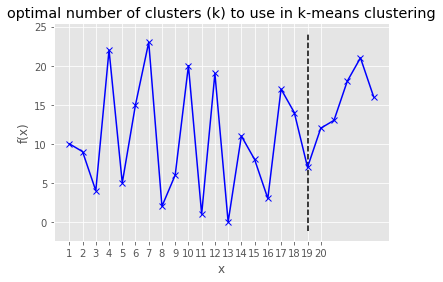

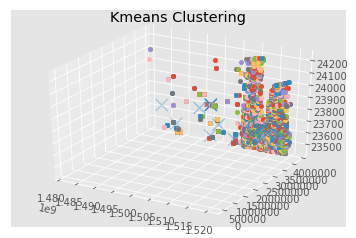

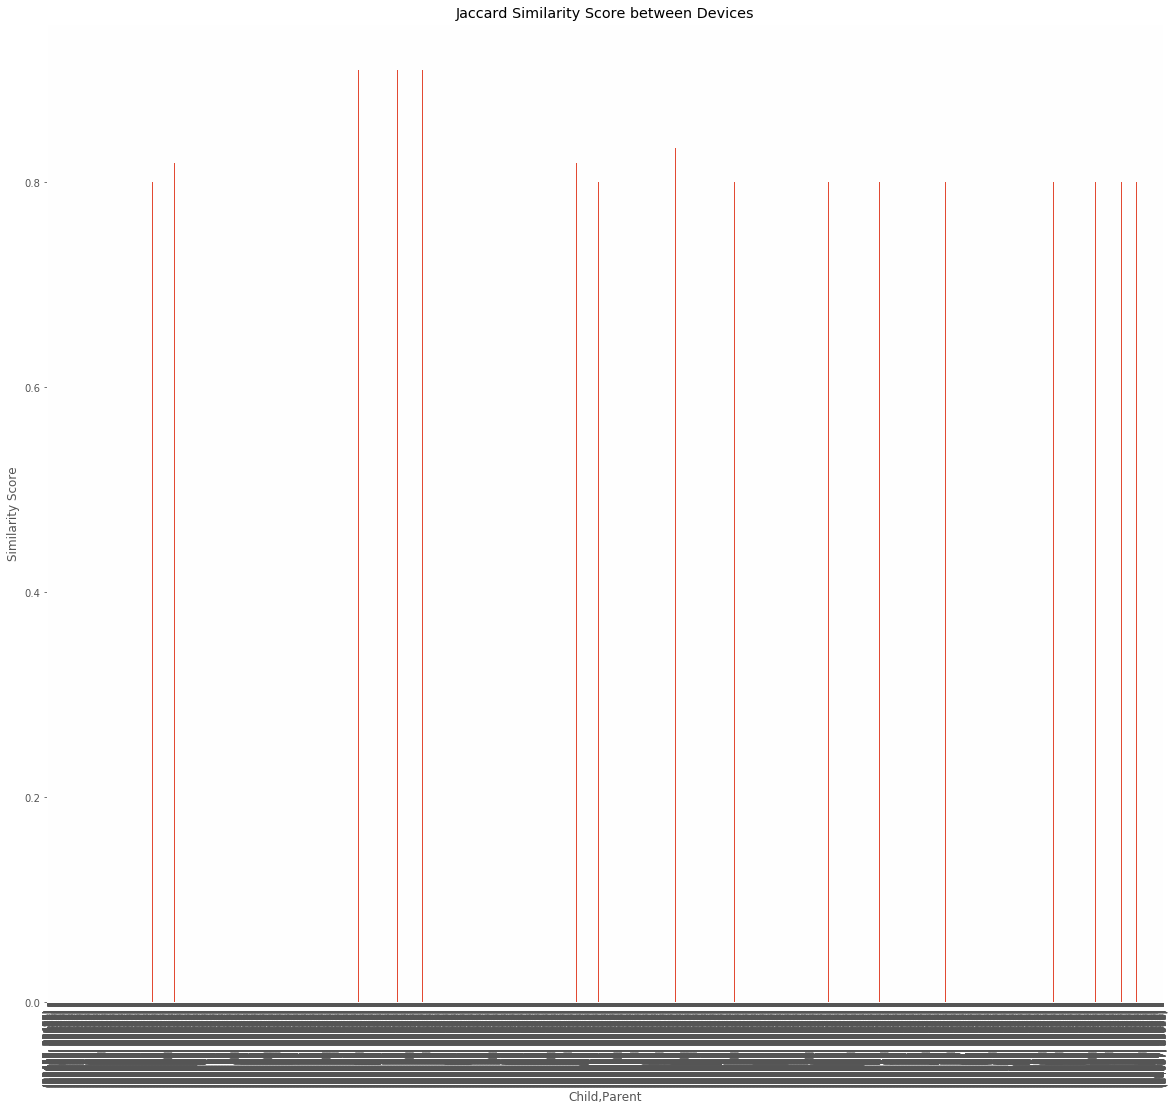

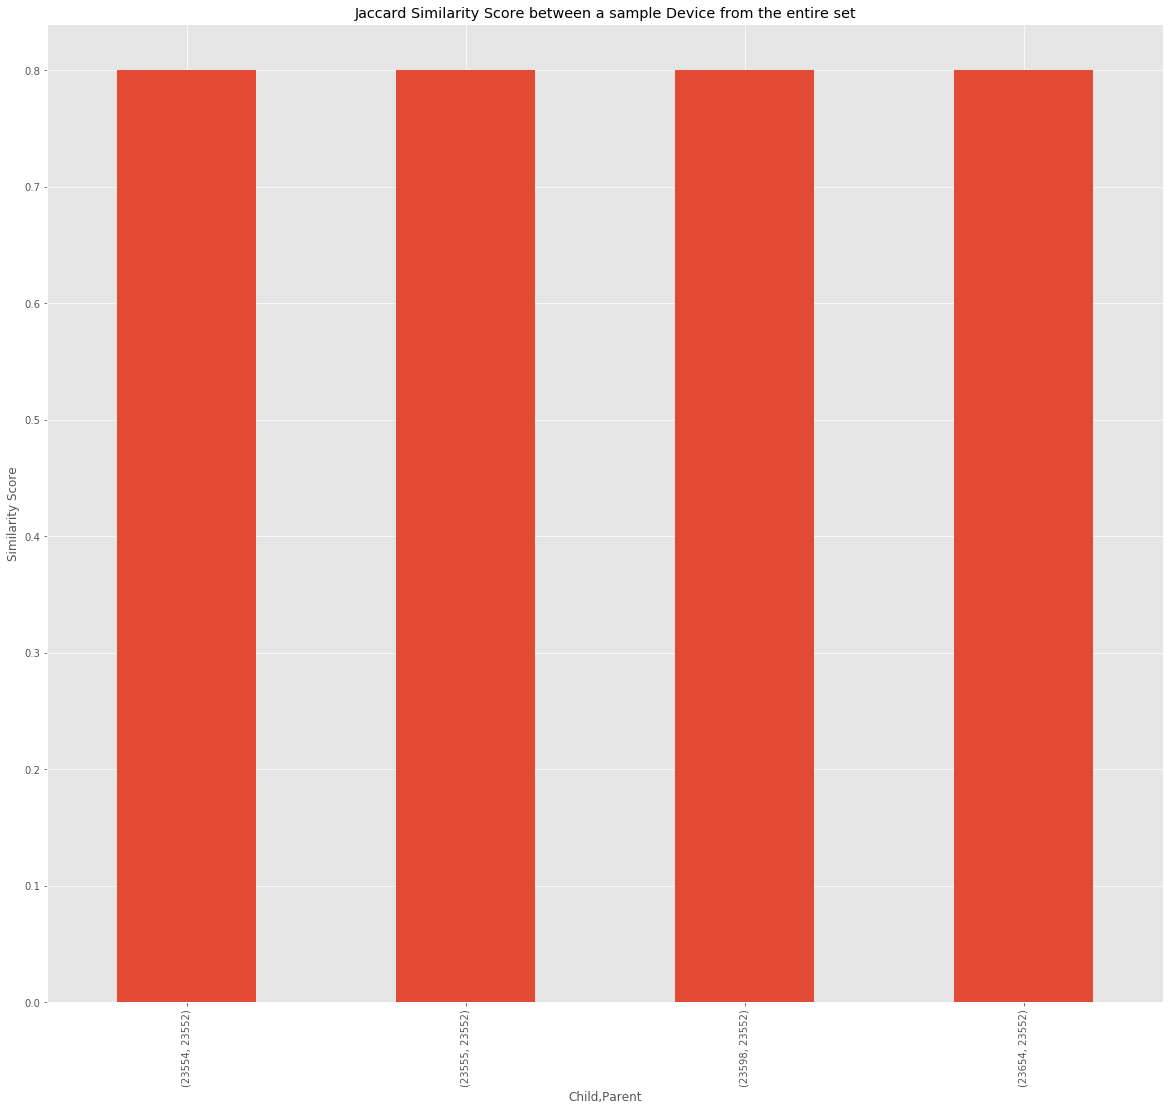

In [2]:
df,X,k = Alarm_Corelation.process_data('Kmeans.csv')
kmeans = Alarm_Corelation.build_model(k)
Alarm_Corelation.train_model(kmeans,X)
Clusters = Alarm_Corelation.predict_clusters(kmeans,X)
Alarm_Corelation.Kmeans_data_visualize(df,X,Clusters,k)
df_cluster = Alarm_Corelation.export_cluster_data(df,Clusters)
Linked_Devices,df_dev = Alarm_Corelation.process_jaccard(df_cluster)
Parent,Child,Jsc = Alarm_Corelation.Parent_Child_Link(Linked_Devices,df_cluster)
Alarm_Corelation.derive_relation(Parent,Child,Jsc)